In [62]:
import sys
import os

sys.path.insert(1, '../../src')

import warnings

warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import time
import pandas as pd
import itertools
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, OrderedDict
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Perceptron
from sklearn import metrics, tree
from scipy import stats
from fancyimpute import MICE


In [2]:
DATAPATH = '../../data_report'

try: os.mkdir(DATAPATH + '/plots')
except: pass
try: os.mkdir(DATAPATH + '/plots/confusion_matrix')
except: pass
try: os.mkdir(DATAPATH + '/datasets/clean')
except: pass
try: os.mkdir(DATAPATH + '/plots/trees')
except: pass
try: os.mkdir(DATAPATH + '/plots/feature_importance')
except: pass

In [96]:
labels=['ECTODERM', 'NEURAL_CREST', 'MESODERM', 'ENDODERM']
datasets = ['../../data_report/datasets/dataset_final.csv']
best_params = {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 100, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': 13, 'class_weight': 'balanced'}
k = 300

In [99]:
features = np.array(['donor_age_at_diagnosis', 'female', 'tumor_stage1_Primary_tumour',
       'tumor_stage2_solid_tissue', 'number_of_breaks',
       'tumor_stage2_other', 'TRA', 'chr_8', 'proportion_chr_8', 'DEL',
       'proportion_chr_5', 'proportion_DUP', 't2tINV', 'proportion_DEL',
       'tumor_stage2_lymph_node', 'proportion_chr_1', 'proportion_DEL_14',
       'proportion_chr_9', 'proportion_TRA', 'proportion_chr_3',
       'proportion_t2tINV', 'chr_10', 'proportion_chr_19',
       'proportion_chr_18', 'proportion_chr_4', 'proportion_h2hINV',
       'proportion_chr_2', 'proportion_chr_7', 'DUP', 'proportion_chr_6',
       'proportion_chr_12', 'proportion_DEL_11', 'proportion_chr_13',
       'proportion_DEL_4', 'proportion_DEL_1', 'proportion_chr_21',
       'proportion_chr_17', 'h2hINV', 'proportion_DUP_7',
       'proportion_DEL_3', 'proportion_chr_11', 'chr_3',
       'proportion_chr_14', 'proportion_DUP_3', 'proportion_DEL_X',
       'proportion_DEL_9', 'chr_7', 'proportion_DEL_5',
       'proportion_chr_16', 'proportion_DEL_12', 'DEL_17',
       'proportion_DUP_8', 'proportion_DUP_12', 'proportion_chr_10',
       'tumor_stage1_Metastatic_tumour', 'chr_11', 'proportion_DEL_7',
       'proportion_DUP_X', 'proportion_DUP_9', 'proportion_DEL_2',
       'proportion_chr_X', 'proportion_DEL_18', 'proportion_DEL_8',
       'chr_5', 'chr_17', 'proportion_chr_22', 'proportion_chr_15',
       'connected_components_max_size', 'proportion_DEL_13',
       'proportion_chr_20', 'chr_19', 'chr_1', 'proportion_DEL_17',
       'DUP_7', 'proportion_DUP_2', 'connected_components', 'chr_4',
       'chr_6', 'proportion_DEL_16', 'proportion_DEL_6', 'chr_9',
       'proportion_DUP_19', 'chr_13', 'proportion_DUP_13', 'chr_2',
       'proportion_DUP_5', 'proportion_DUP_1', 'DEL_10', 'chr_18',
       'chr_12', 'chr_21', 'proportion_DEL_10', 'DUP_10',
       'proportion_DUP_11', 'chr_16', '(1,8)', 'proportion_DUP_4',
       'proportion_DEL_19', 'chr_20', 'proportion_DEL_20', 'DEL_1',
       'proportion_DEL_22', '(3,5)', '(11,17)', 'DEL_3', 'chr_14',
       'DEL_14', 'proportion_DUP_14', 'proportion_DUP_17', 'DEL_4',
       'proportion_DUP_20', 'proportion_DEL_15', 'DUP_2',
       'proportion_DEL_21', 'chr_X', 'proportion_DUP_16',
       'tumor_stage2_blood_derived_(peripheral_blood)',
       'proportion_DUP_6', 'DEL_8', 'DEL_2', 'DEL_11', 'DEL_12', 'DEL_5',
       'chr_22', 'DEL_19', 'proportion_DUP_21', 'proportion_DUP_15',
       'DUP_1', '(17,18)', 'DUP_6', 'DUP_12', 'DEL_6', '(2,7)',
       'proportion_DUP_10', '(5,8)', 'DEL_X', 'DUP_8', 'DEL_13', 'DEL_9',
       '(6,12)', 'DUP_9', '(2,17)', 'DEL_7', 'DUP_5', '(3,14)', '(1,5)',
       '(12,19)', 'proportion_DUP_18', '(2,4)', '(6,20)', 'DEL_18',
       'chr_15', 'DEL_16', 'DEL_21', '(2,14)', 'DUP_X', '(5,12)', 'DUP_3',
       'DEL_15', '(1,9)', 'proportion_DUP_22', '(12,18)', '(5,6)',
       '(5,19)', 'DUP_11', '(10,12)', '(1,17)', 'DUP_19', '(2,15)',
       '(1,6)', '(9,14)', '(8,14)', '(1,11)', '(6,10)', '(11,12)',
       'DUP_16', '(2,3)', '(7,17)', '(8,20)', '(7,12)', '(2,10)',
       'DUP_21', '(1,19)', '(3,7)', '(14,22)', 'DEL_22',
       'tumor_stage1_Recurrent_tumour', 'DEL_20', 'DUP_20', '(8,12)',
       '(6,16)', '(6,17)', '(1,2)', '(3,X)', '(6,8)', 'DUP_4', '(1,12)',
       '(12,17)', '(3,19)', '(11,19)', '(2,12)', 'DUP_14', '(1,4)',
       '(3,12)', '(16,17)', '(6,13)', '(21,X)', '(4,14)', '(15,17)',
       'tumor_stage2_blood_derived_(bone_marrow)', 'DUP_17', '(15,16)',
       'DUP_18', '(12,22)', '(20,X)', '(1,21)', '(3,16)', '(4,8)',
       '(19,20)', '(1,3)', '(8,15)', '(4,10)', '(11,20)', '(12,X)',
       '(5,X)', '(9,13)', '(8,9)', '(14,18)', '(4,5)', '(9,15)',
       '(19,22)', '(7,20)', '(6,11)', '(15,19)', '(3,21)', '(8,18)',
       '(17,22)', 'DUP_22', '(3,6)', '(10,X)', '(11,14)', '(11,13)',
       '(12,15)', 'DUP_15', '(7,19)', '(16,19)', '(2,5)', '(4,X)',
       '(6,9)', '(9,X)', 'DUP_13', '(1,10)', '(5,9)', '(12,13)', '(8,11)',
       '(1,14)', '(15,18)', '(2,9)', '(18,21)', '(2,11)', '(6,19)',
       '(3,11)', '(8,19)', '(7,14)', '(10,17)', '(4,7)', '(7,16)',
       '(4,20)', '(9,22)', '(11,16)', '(14,X)', '(8,17)', '(10,11)',
       '(4,12)', '(16,20)', '(19,X)', '(11,X)', '(7,9)', '(3,4)',
       '(10,20)', '(17,19)', '(7,18)', '(5,11)', '(5,15)', '(7,13)',
       '(13,17)', '(17,20)', '(1,7)', '(10,19)', '(3,9)', '(4,17)',
       '(19,21)', '(17,X)', '(12,14)', '(3,15)', '(3,10)', '(1,X)',
       '(9,19)', '(20,21)', '(10,16)', '(2,X)', '(3,22)', '(8,16)',
       '(9,11)', '(7,10)', '(5,18)', '(13,18)', '(6,15)', '(14,19)',
       '(2,21)', '(8,21)', '(4,6)', '(3,20)', '(8,10)',
       'tumor_stage2_metastasis_local_to_lymph_node', '(4,15)', '(4,9)',
       '(2,18)', '(7,8)', '(5,7)', '(5,14)', '(4,11)', '(5,21)',
       '(14,20)', '(10,18)', '(13,X)', '(18,22)', '(13,19)', '(2,13)',
       '(16,X)', 'chr_Y', '(1,13)', '(5,13)', '(6,14)', '(10,15)',
       '(8,13)', '(7,X)', '(5,16)', '(4,22)', '(15,22)', '(9,18)',
       '(4,19)', '(3,18)', '(11,18)', '(5,17)', '(18,X)', '(3,17)',
       '(18,19)', '(1,20)', '(12,20)', '(11,21)', '(11,15)', '(22,Y)',
       '(22,X)', '(11,22)', '(9,20)', '(11,Y)', '(9,21)', '(9,Y)',
       '(12,16)', '(12,21)', '(10,22)', '(12,Y)', '(13,14)', '(13,15)',
       '(13,16)', '(X,Y)', '(7,22)', '(7,21)', '(13,20)', '(13,21)',
       '(13,22)', '(10,Y)', '(2,6)', '(13,Y)', '(10,21)', '(3,13)',
       '(8,22)', '(1,15)', '(1,16)', 'proportion_DUP_Y',
       'proportion_DEL_Y', 'proportion_chr_Y', '(1,18)', '(1,22)',
       '(7,Y)', '(8,X)', '(1,Y)', '(8,Y)', '(10,13)', '(10,14)', '(3,8)',
       '(9,10)', '(9,12)', '(3,Y)', '(9,16)', '(9,17)', '(7,15)',
       '(14,15)', '(2,8)', '(18,20)', '(5,20)',
       'tumor_stage2_metastasis_to_distant_location', '(20,22)', '(4,13)',
       'tumor_stage2_derived_from_tumour', '(18,Y)', '(2,Y)',
       'tumor_stage2_NOS', '(4,16)', '(19,Y)', '(5,10)',
       'tumor_stage1_Cell_line', '(4,Y)', '(2,16)', '(4,18)', '(2,19)',
       '(2,20)', '(4,21)', '(2,22)', 'DUP_Y', 'DEL_Y', '(5,22)', '(17,Y)',
       '(14,16)', '(5,Y)', '(14,17)', '(7,11)', '(6,Y)', '(14,21)',
       '(6,X)', '(14,Y)', '(21,Y)', '(15,20)', '(15,21)', '(21,22)',
       '(15,X)', '(15,Y)', '(16,18)', '(6,22)', '(16,21)', '(16,22)',
       '(6,21)', '(16,Y)', '(6,18)', '(20,Y)', '(17,21)', '(6,7)'],
      dtype=object)

# Plot funtions

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, name='patata'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        # print('Confusion matrix, without normalization')
        pass

    # print(cm)
    plt.figure(figsize=(10, 12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=30,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plot_path = DATAPATH + '/plots/confusion_matrix/'
    plt.savefig(plot_path + title + name + '.png',bbox_inches='tight')

def plot_feature_importance(feature_importance, name):
    plt.clf()
    plt.figure(figsize=(20, 10))
    values0 = feature_importance.loc[feature_importance['importance'] > 0].index
    values1 = feature_importance.loc[feature_importance['importance'] > 0]['importance'].values

    plt.bar(values0[:10], values1[:10])
    plt.xticks(values0[:10], rotation=60)
    plt.title('Feature importance')
    plt.show()
    plt.savefig(DATAPATH + '/plots/feature_importance/' + 'feature_importance_' + name + '.png',bbox_inches='tight')

    
def plot_tree_graph(random_forest,columns,name):
    i = 0
    for tree_in_forest in random_forest.estimators_[:1]:
        # Create DOT data
        dot_data = tree.export_graphviz(tree_in_forest, out_file=None,
                                        feature_names=list(columns),
                                        class_names=random_forest.classes_)
        # Draw graph
        graph = pydotplus.graph_from_dot_data(dot_data)

        # Show graph
        graph.create_png()
        graph.write_png(DATAPATH + '/plots/trees' + '/' + name + ".png")
        i += 1

# Preprocessing

In [77]:
def load_data(dataset_file):
    try: 
        X_train = pd.read_csv(dataset_file.replace('.csv', '_clean.csv'),index_col=0)
        Y_train = X_train.pop('histology_tier1')
        X_test = pd.read_csv(dataset_file.replace('.csv', '_test_clean.csv'),index_col=0)
        Y_test = X_test.pop('histology_tier1')
        print 'Dataset', dataset_file.replace('.csv', '_clean.csv')    
    except:
        print 'Dataset', dataset_file        
        df = pd.read_csv(dataset_file)
        print 'Preprocessing dataset:', dataset_file
        X_train, Y_train, X_test, Y_test = preprocessing(df)
    return X_train, Y_train, X_test, Y_test

def nan_imputing(df):
    """
    There is only one feature with nans. Donor age at diagnosis. 
    We impute it using the MICE strategy
    :param df:
    :return:
    """
    # Imput missing data with mice
    fancy_imputed = df
    dummies = pd.get_dummies(df)
    imputed = pd.DataFrame(data=MICE(verbose=False).complete(dummies), columns=dummies.columns, index=dummies.index)
    fancy_imputed.donor_age_at_diagnosis = imputed.donor_age_at_diagnosis
    fancy_imputed['donor_age_at_diagnosis'] = fancy_imputed['donor_age_at_diagnosis'].astype(np.int)
    return fancy_imputed

def preprocessing(df):
    y = df.pop('histology_tier1')
    X = df.drop(['Unnamed: 0', 'histology_tier2'], axis=1)
    X['donor_sex'] = X['donor_sex'].str.replace('female','1')
    X['donor_sex'] = X['donor_sex'].str.replace('male','0')

    X['female'] = pd.to_numeric(X['donor_sex'])
    
    X = X.drop('donor_sex',axis=1)
    X_train, X_test, Y_train, Y_test = \
        train_test_split(pd.get_dummies(X), y, stratify=y, test_size=.2, random_state=42)
    X_train = nan_imputing(X_train)
    X_test = nan_imputing(X_test)
    X_train['number_of_breaks'] = X_train['DUP'] + X_train['DEL'] + X_train['TRA'] + X_train['h2hINV'] + \
                                  X_train['t2tINV']
    X_test['number_of_breaks'] = X_test['DUP'] + X_test['DEL'] + X_test['TRA'] + X_test['h2hINV'] + X_test[
        't2tINV']
    for column in X_train.columns:
        if 'chr' in column:
            X_train['proportion_' + column] = 0
            X_train[['proportion_' + column]] = np.true_divide(np.float32(X_train[[column]]),
                                                               np.float32(X_train[['number_of_breaks']]))
            X_test['proportion_' + column] = 0
            X_test[['proportion_' + column]] = np.true_divide(np.float32(X_test[[column]]),
                                                              np.float32(X_test[['number_of_breaks']]))

        if 'DUP' in column or 'DEL' in column or 'TRA' in column or 'h2hINV' in column or 't2tINV' in column:
            X_train['proportion_' + column] = 0
            X_train[['proportion_' + column]] = np.true_divide(np.float32(X_train[[column]]),
                                                               np.float32(X_train[['number_of_breaks']]))
            X_test['proportion_' + column] = 0
            X_test[['proportion_' + column]] = np.true_divide(np.float32(X_test[[column]]),
                                                              np.float32(X_test[['number_of_breaks']]))

    X_train.head()
    return X_train, Y_train, X_test, Y_test

# SVM

In [45]:
def try_svm(X_train, Y_train, X_test, Y_test, name='with_max_cc',
                               path=DATAPATH + '/plots/trees'):
    from sklearn.svm import SVC
    import random
    n_iter_search = 5
    # f = open('../../data/best_params' + 'random_forest' + name + '.txt', 'w')
    param_dist = {"C": stats.uniform(0, 1),
                  "kernel": ['rbf', 'linear', 'poly', 'sigmoid'],
                  "decision_function_shape": ['ovo', 'ovr']
                  }
    labels = ['ECTODERM', 'NEURAL_CREST', 'MESODERM', 'ENDODERM']
    clf = SVC(class_weight='balanced')

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, iid=False,
                                       n_iter=n_iter_search, pre_dispatch=3, n_jobs=-1)
    random_search.fit(X_train, Y_train.values.ravel())
    print('trained')
    score = random_search.score(X_test, Y_test)

    # f.write('Random Forest ' + str(score))
    print 'SVM', score
    y_test_pred = random_search.predict(X_test)
    # Compute confusion matrix
    class_names = labels
    cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                          labels=class_names)

    print(cnf_matrix)

# Random forest feature selection and classification

In [11]:
def feature_extraction_and_classification_rf(X_train, y_train, X_test, y_test, name, n_iter_search = 50,class_names=labels):
    # Random forest
   
    param_dist = {"max_depth": stats.randint(2, 20),
                  "min_samples_split": stats.randint(2, 11),
                  "min_samples_leaf": stats.randint(1, 20),
                  "bootstrap": [True, False],
                  "max_features": ['auto', 'log2', None],
                  "criterion": ["gini", "entropy"]}

    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, iid=False,
                                       n_iter=n_iter_search, pre_dispatch=3, n_jobs=-1)

    random_search.fit(X_train, y_train.values.ravel())

    best_params = random_search.best_params_
    best_params['n_estimators'] = 100
    best_params['class_weight'] = 'balanced'
    print 'Best params', best_params
    random_forest = RandomForestClassifier(**best_params)

    random_forest = random_forest.fit(X_train, y_train)

    # plot the graph
    plot_tree_graph(random_forest,X_train.columns,name)
    
    # plot the feature importance
    feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index=X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    plot_feature_importance(feature_importances, name)
    
    # plot the classification results
    score = random_forest.score(X_test, y_test)

    print 'Random Forest', score
    y_test_pred = random_search.predict(X_test)
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred,
                                          labels=class_names)

    print(cnf_matrix)
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization', name=name)

    # Plot normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix', name=name)
    
    return feature_importances



In [72]:
def run_feature_extractor(dataset_files_paht,n_iter):
    """
    :param dataset_files_paht: array[string] array of the paths of the datasets to test
    :param n_iter: number of iterations on the crossvalidation
    :return: 
    """
    for path in dataset_files_paht:
        try:
            X_train, Y_train, X_test, Y_test = load_data(path)
            print 'Running feature extractor..'
            feature_importance = feature_extraction_and_classification_rf(X_train, Y_train, X_test, Y_test, name='find_best_hyper', n_iter_search = n_iter)
            # save the clean dataset for revise it is ok
            X_train['histology_tier1'] = Y_train
            X_test['histology_tier1'] = Y_test
            X_train.to_csv(path.replace('.csv', '_clean.csv'))
            X_test.to_csv(path.replace('.csv', '_test_clean.csv'))
        except Exception as e:
            print('This path is not working:', path)
            print('Error:',e)
    return feature_importance

# One vs All

In [44]:
def one_vs_all_random_forest(dataset_file,meta=True):
    print 'Dataset', dataset_file

    for class_name in labels:

        print 'One vs all ', class_name
        to_remove = [c for c in labels if c != class_name]

        df = pd.read_csv(dataset_file)
        df = df.replace(to_replace=to_remove, value='OTHER')
        print 'Preprocessing dataset:', dataset_file

        X_train, Y_train, X_test, Y_test = preprocessing(df)
        print(X_train.columns)
        feature_extraction_and_classification_rf(X_train, Y_train, X_test, Y_test, name='report', n_iter_search = 50,class_names=[class_name, 'OTHER'])

    if not meta:    
        for class_name in labels:

            print 'One vs all no meta', class_name
            to_remove = [c for c in labels if c != class_name]

            df = pd.read_csv(path)
            df = df.drop(['donor_age_at_diagnosis', 'donor_sex', 'tumor_stage1', 'tumor_stage2'], axis=1)
            df = df.replace(to_replace=to_remove, value='OTHER')
            X_train, Y_train, X_test, Y_test = preprocessing(df)
            feature_extraction_and_classification_rf(X_train, Y_train, X_test, Y_test, name='report', n_iter_search = 50)



# Best params calculation
We obtained: 
Best params {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 100, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': 13, 'class_weight': 'balanced'}


In [98]:
# first run to find the best hyperparameters and extract the features
feature_importance = run_feature_extractor(datasets,500)

features = np.array(feature_importance.index)
features

array(['donor_age_at_diagnosis', 'female', 'tumor_stage1_Primary_tumour',
       'tumor_stage2_solid_tissue', 'number_of_breaks',
       'tumor_stage2_other', 'TRA', 'chr_8', 'proportion_chr_8', 'DEL',
       'proportion_chr_5', 'proportion_DUP', 't2tINV', 'proportion_DEL',
       'tumor_stage2_lymph_node', 'proportion_chr_1', 'proportion_DEL_14',
       'proportion_chr_9', 'proportion_TRA', 'proportion_chr_3',
       'proportion_t2tINV', 'chr_10', 'proportion_chr_19',
       'proportion_chr_18', 'proportion_chr_4', 'proportion_h2hINV',
       'proportion_chr_2', 'proportion_chr_7', 'DUP', 'proportion_chr_6',
       'proportion_chr_12', 'proportion_DEL_11', 'proportion_chr_13',
       'proportion_DEL_4', 'proportion_DEL_1', 'proportion_chr_21',
       'proportion_chr_17', 'h2hINV', 'proportion_DUP_7',
       'proportion_DEL_3', 'proportion_chr_11', 'chr_3',
       'proportion_chr_14', 'proportion_DUP_3', 'proportion_DEL_X',
       'proportion_DEL_9', 'chr_7', 'proportion_DEL_5',
      

Text(0.5,1,'Best  10 features')

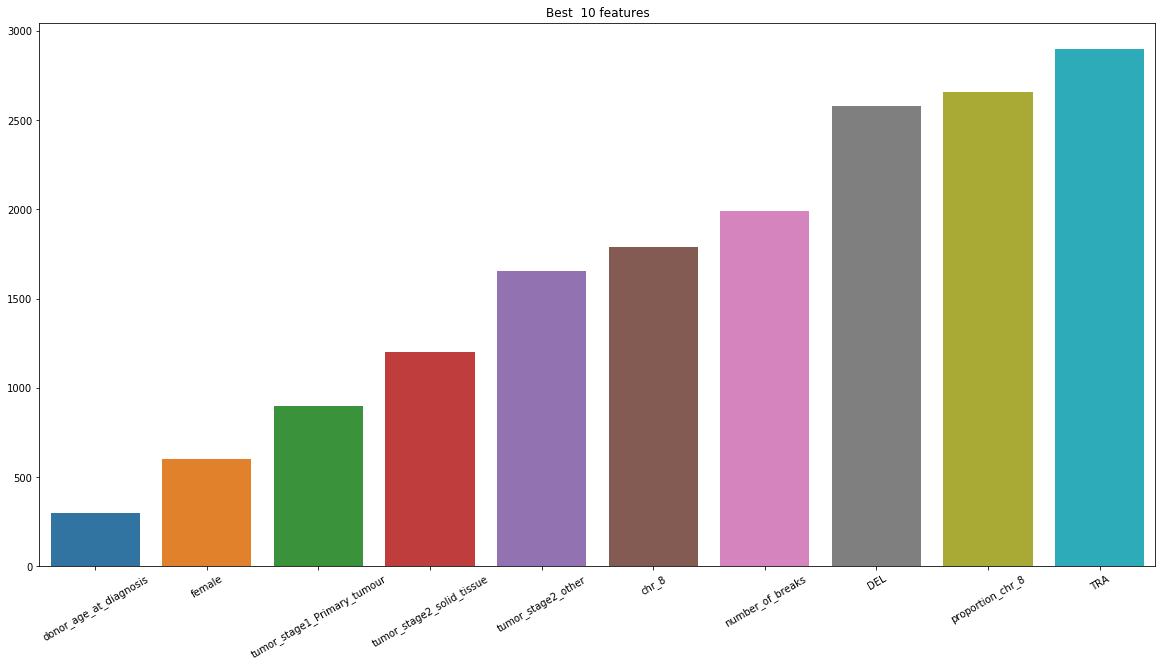

In [101]:
# sorted_by_value = sorted(fi_dict.items(), key=lambda kv: kv[1])
D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
plt.figure(figsize=(20, 10))

sns.barplot(range(10), list(D.values())[:10])
plt.xticks(range(10), list(D.keys())[:10], rotation=30)
plt.title('Best  10 features')

# Feature selection: 
We fix the hyperparameters and train a random forest k times. Then we sum the positions of the features and return them as a dictionary

In [123]:
def voting_feature_selection(dataset_file,k,best_params,features,name='best'):
    # k= number of votations
    # Find the order of every feature
    try: 
        X_train = pd.read_csv(dataset_file.replace('.csv', '_clean.csv'),index_col=0)
        Y_train = X_train.pop('histology_tier1')
        print 'Dataset', dataset_file.replace('.csv', '_clean.csv')    
    except:
        print 'Dataset', dataset_file        
        df = pd.read_csv(dataset_file)
        print 'Preprocessing dataset:', dataset_file
        X_train, Y_train, X_test, Y_test = preprocessing(df)
    feature_importance = {feature:0 for feature in features}
    for i in range(k):
        if i%10==0:
            print i
        random_forest = RandomForestClassifier(**best_params)
        random_forest = random_forest.fit(X_train, Y_train)
        local_fi = np.array(pd.DataFrame(random_forest.feature_importances_,
                                       index=X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False).index)
        j = 1
        for feature in local_fi:
            feature_importance[feature] += j
            j +=1
    D = OrderedDict((k, v) for k, v in sorted(feature_importance.iteritems(), key=lambda kv: kv[1]))
    size = 15
    sns.barplot(range(size), np.array(D.values())[:size]/300)
    plt.xticks(range(size), list(D.keys())[:size], rotation=30)
    plt.title('Best '+ str(size) +' features mean positions')
    plt.savefig(DATAPATH + '/plots/feature_importance/' + 'feature_importance_' + name + '.png',bbox_inches='tight')
    return D

In [40]:
features = np.array(feature_importance.index)
k = 300
fi_dict = voting_feature_selection(datasets[0],k,best_params,features)
fi_dict

Dataset ../../data_chromosome/datasets/dataset_final_clean.csv


{'(1,10)': 63243,
 '(1,11)': 61732,
 '(1,12)': 51029,
 '(1,13)': 91303,
 '(1,14)': 81172,
 '(1,15)': 86318,
 '(1,16)': 90850,
 '(1,17)': 52799,
 '(1,18)': 88424,
 '(1,19)': 63143,
 '(1,2)': 72480,
 '(1,20)': 87558,
 '(1,21)': 87178,
 '(1,22)': 89904,
 '(1,3)': 66446,
 '(1,4)': 74364,
 '(1,5)': 59825,
 '(1,6)': 52055,
 '(1,7)': 76224,
 '(1,8)': 39646,
 '(1,9)': 65478,
 '(1,X)': 66491,
 '(1,Y)': 114710,
 '(10,11)': 75005,
 '(10,12)': 54087,
 '(10,13)': 102081,
 '(10,14)': 89908,
 '(10,15)': 99058,
 '(10,16)': 71810,
 '(10,17)': 96565,
 '(10,18)': 100598,
 '(10,19)': 95788,
 '(10,20)': 69157,
 '(10,21)': 111632,
 '(10,22)': 109763,
 '(10,X)': 84413,
 '(10,Y)': 113135,
 '(11,12)': 71836,
 '(11,13)': 55072,
 '(11,14)': 79154,
 '(11,15)': 104871,
 '(11,16)': 71241,
 '(11,17)': 27546,
 '(11,18)': 82325,
 '(11,19)': 70241,
 '(11,20)': 72788,
 '(11,21)': 105024,
 '(11,22)': 104910,
 '(11,X)': 85368,
 '(11,Y)': 113276,
 '(12,13)': 92242,
 '(12,14)': 92855,
 '(12,15)': 70605,
 '(12,16)': 99374,
 

(array([1, 2, 3, 4, 5, 5, 6, 8, 8, 9]),
 array(['donor_age_at_diagnosis', 'female', 'tumor_stage1_Primary_tumour',
        'tumor_stage2_solid_tissue', 'tumor_stage2_other', 'chr_8',
        'number_of_breaks', 'DEL', 'proportion_chr_8', 'TRA'], dtype='|S45'))

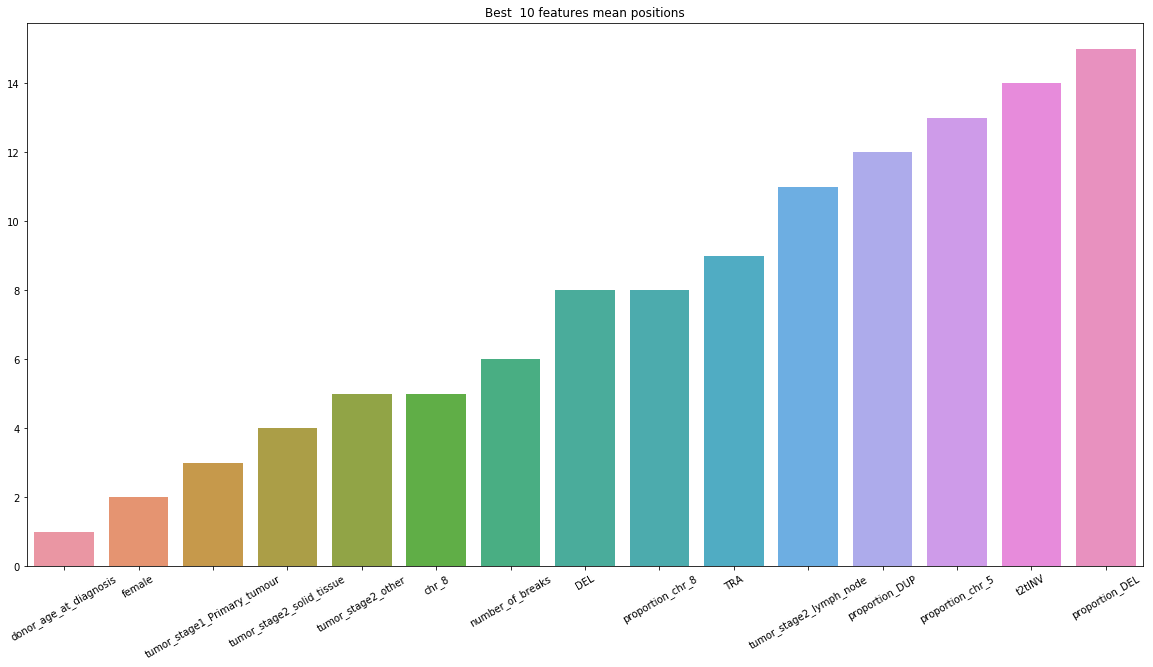

In [89]:
D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
plt.figure(figsize=(20, 10))
size = 15
sns.barplot(range(size), np.array(D.values())[:size]/300)
plt.xticks(range(size), list(D.keys())[:size], rotation=30)
plt.title('Best  10 features mean positions')

np.array(D.values())[:10]/300, np.array(D.keys())[:10]

Number of features 200
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'(1,10)', u'(1,11)', u'(1,12)', u'(1,17)', u'(1,19)', u'(1,3)',
       u'(1,5)', u'(1,6)', u'(1,8)', u'(1,9)',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=200), (2068, 200))
Random Forest 0.7702702702702703
[[ 25   0  13   4]
 [  1  56   4  12]
 [ 13   6  94  33]
 [ 10   1  22 224]]


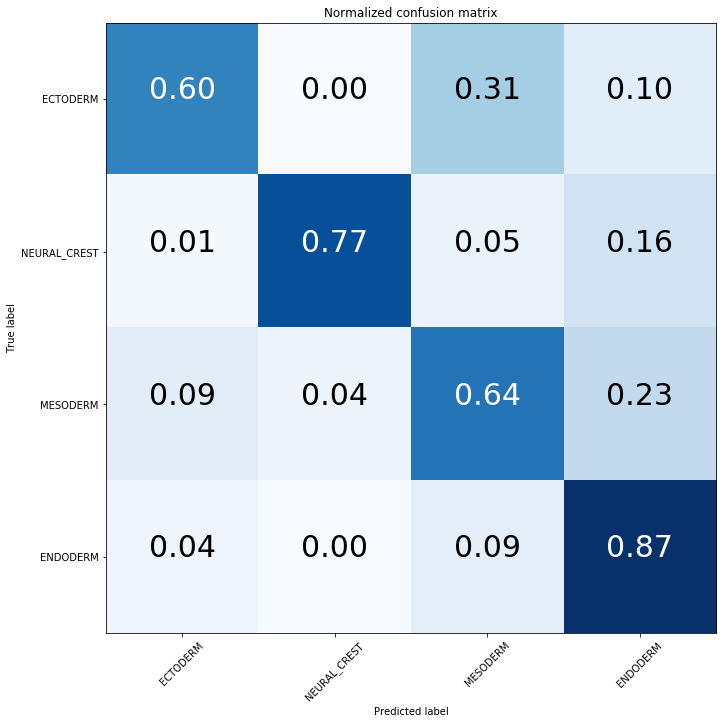

Number of features 150
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'(1,8)', u'(11,17)', u'(12,19)', u'(17,18)', u'(2,7)', u'(3,5)',
       u'(5,8)', u'(6,12)', u'donor_age_at_diagnosis', u'connected_components',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=150), (2068, 150))
Random Forest 0.7799227799227799
[[ 26   0  13   3]
 [  1  56   6  10]
 [ 14   4 100  28]
 [  8   1  26 222]]


<Figure size 432x288 with 0 Axes>

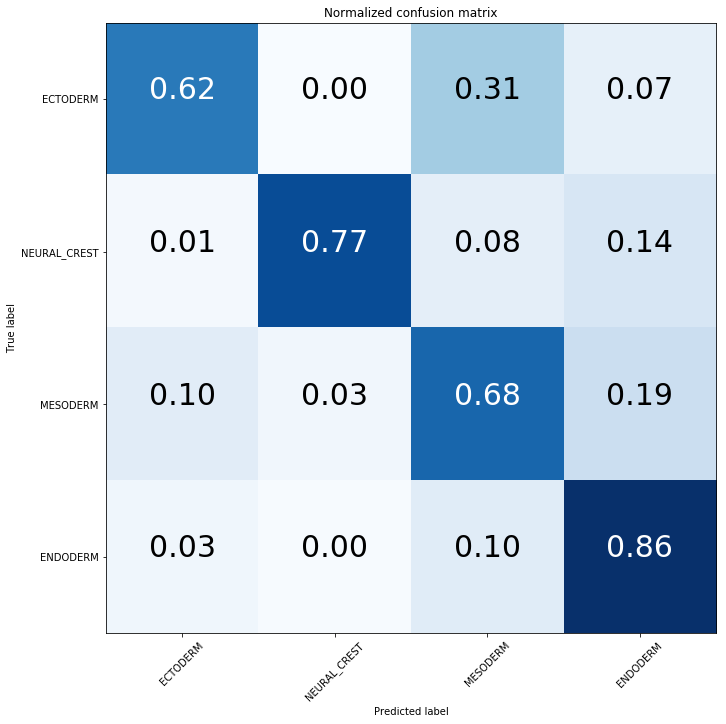

Number of features 100
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'(11,17)', u'donor_age_at_diagnosis', u'connected_components',
       u'connected_components_max_size', u'chr_1', u'DEL_1', u'chr_2',
       u'chr_3', u'chr_4', u'chr_5', u'chr_6', u'chr_7', u'DUP_7', u'chr_8',
       u'chr_9', u'chr_10', u'DEL_10', u'DUP_10', u'chr_11', u'chr_12',
       u'chr_13', u'chr_17', u'DEL_17', u'chr_18', u'chr_19', u'chr_20',
       u'chr_21', u'DUP', u'DEL', u'TRA', u'h2hINV', u't2tINV',
       u'number_of_breaks', u'female', u'tumor_stage1_Metastatic_tumour',
       u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_1', u'proportion_DEL_1',
       u'proportion_DUP_1', u'proportion_chr_2', u'proportion_DEL_2',
       u'proportion_DUP_2', u'proportion_chr_3', u'proportion_DEL_3',
       u'proportion_DUP_3', u'proportion_c

<Figure size 432x288 with 0 Axes>

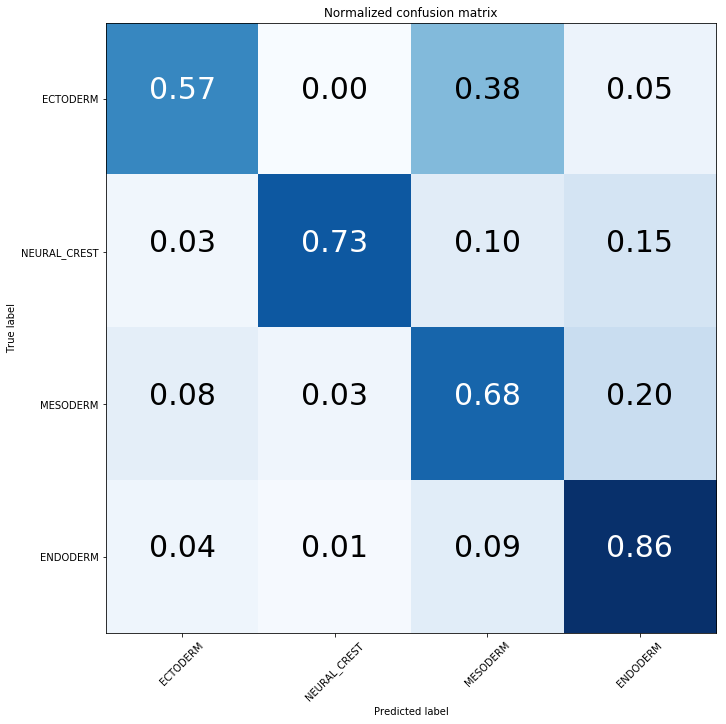

Number of features 50
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'donor_age_at_diagnosis', u'chr_7', u'chr_8', u'chr_10', u'DUP',
       u'DEL', u'TRA', u't2tINV', u'number_of_breaks', u'female',
       u'tumor_stage1_Primary_tumour', u'tumor_stage2_lymph_node',
       u'tumor_stage2_other', u'tumor_stage2_solid_tissue',
       u'proportion_chr_1', u'proportion_DEL_1', u'proportion_chr_2',
       u'proportion_chr_3', u'proportion_DEL_3', u'proportion_chr_4',
       u'proportion_DEL_4', u'proportion_chr_5', u'proportion_DEL_5',
       u'proportion_chr_6', u'proportion_chr_7', u'proportion_DEL_7',
       u'proportion_DUP_7', u'proportion_chr_8', u'proportion_DUP_8',
       u'proportion_chr_9', u'proportion_DEL_9', u'proportion_chr_10',
       u'proportion_chr_11', u'proportion_DEL_11', u'proportion_chr_12',
       u'proportion_DEL_12', u'proportion_chr_13', u'proportion_chr_14',
       u'proportion_DEL_14', u'proportion_chr_17', u'proportion_chr_18',
       u'pro

<Figure size 432x288 with 0 Axes>

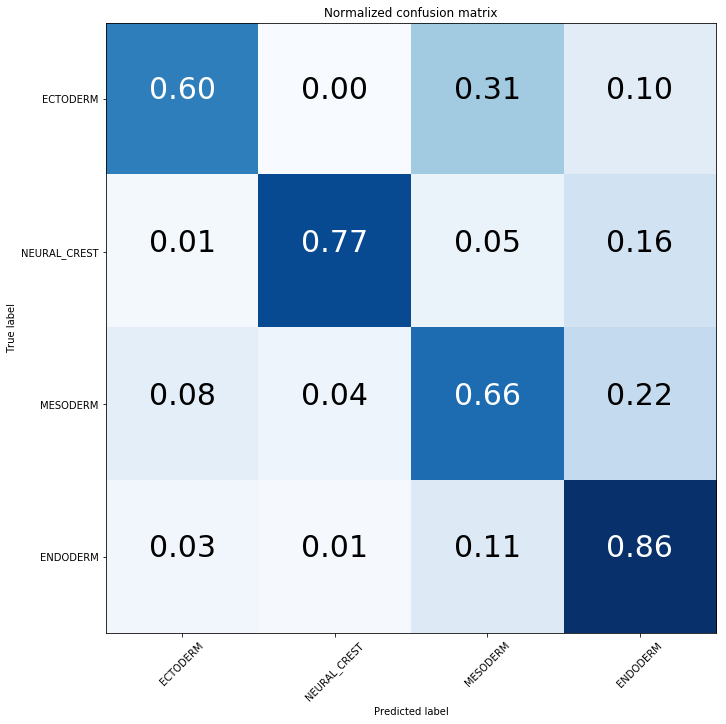

Number of features 20
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'donor_age_at_diagnosis', u'chr_8', u'DEL', u'TRA', u't2tINV',
       u'number_of_breaks', u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_1', u'proportion_chr_5',
       u'proportion_chr_8', u'proportion_chr_9', u'proportion_DEL_14',
       u'proportion_DUP', u'proportion_DEL', u'proportion_TRA',
       u'proportion_h2hINV'],
      dtype='object'), (2068, 20))
Random Forest 0.7741312741312741
[[ 28   0  10   4]
 [  2  58   5   8]
 [ 13   4 105  24]
 [ 12   2  33 210]]


<Figure size 432x288 with 0 Axes>

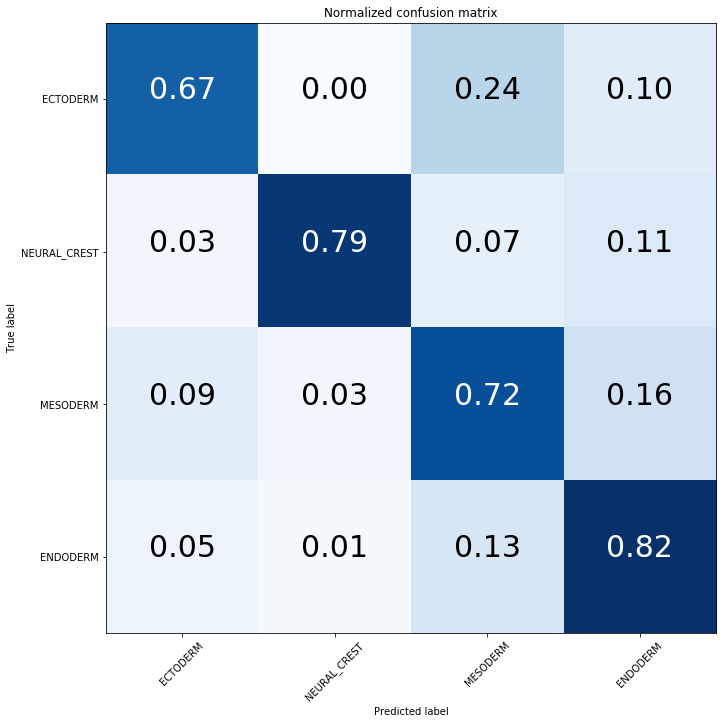

Number of features 15
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'donor_age_at_diagnosis', u'chr_8', u'DEL', u'TRA', u't2tINV',
       u'number_of_breaks', u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_5', u'proportion_chr_8',
       u'proportion_DUP', u'proportion_DEL'],
      dtype='object'), (2068, 15))
Random Forest 0.7722007722007722
[[ 32   0   6   4]
 [  3  57   5   8]
 [ 15   5  96  30]
 [ 10   1  31 215]]


<Figure size 432x288 with 0 Axes>

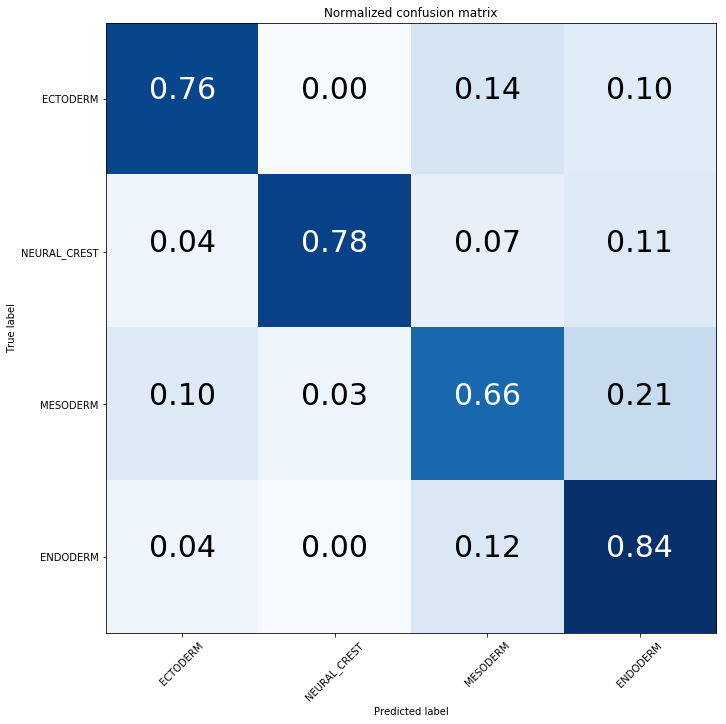

Number of features 10
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'donor_age_at_diagnosis', u'chr_8', u'DEL', u'TRA',
       u'number_of_breaks', u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_other', u'tumor_stage2_solid_tissue',
       u'proportion_chr_8'],
      dtype='object'), (2068, 10))
Random Forest 0.7374517374517374
[[ 29   0   8   5]
 [  4  54   9   6]
 [ 27   1  88  30]
 [ 17   1  28 211]]


<Figure size 432x288 with 0 Axes>

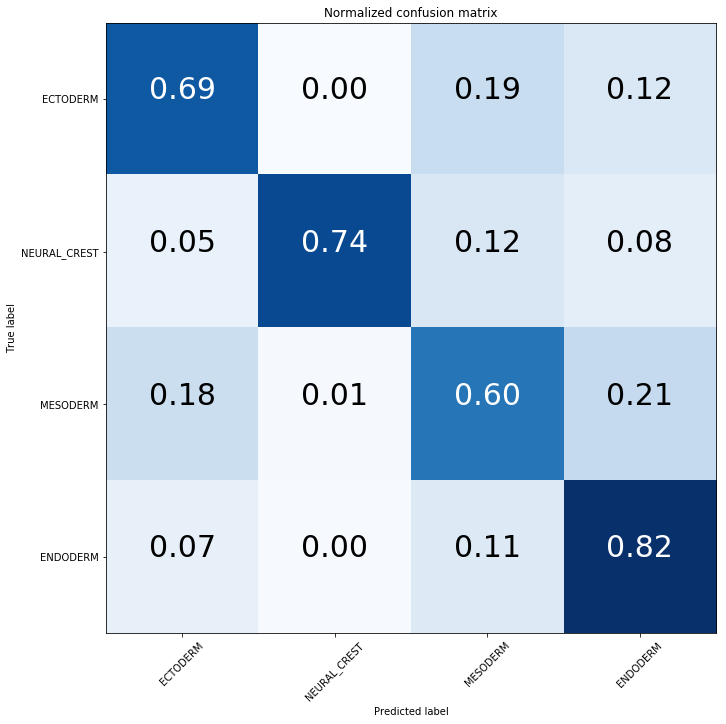

Number of features 5
Dataset ../../data_report/datasets/dataset_final_clean.csv
(Index([u'donor_age_at_diagnosis', u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_other', u'tumor_stage2_solid_tissue'],
      dtype='object'), (2068, 5))
Random Forest 0.6447876447876448
[[ 32   0   9   1]
 [  5  57   7   4]
 [ 49   3  60  34]
 [ 45   6  21 185]]


<Figure size 432x288 with 0 Axes>

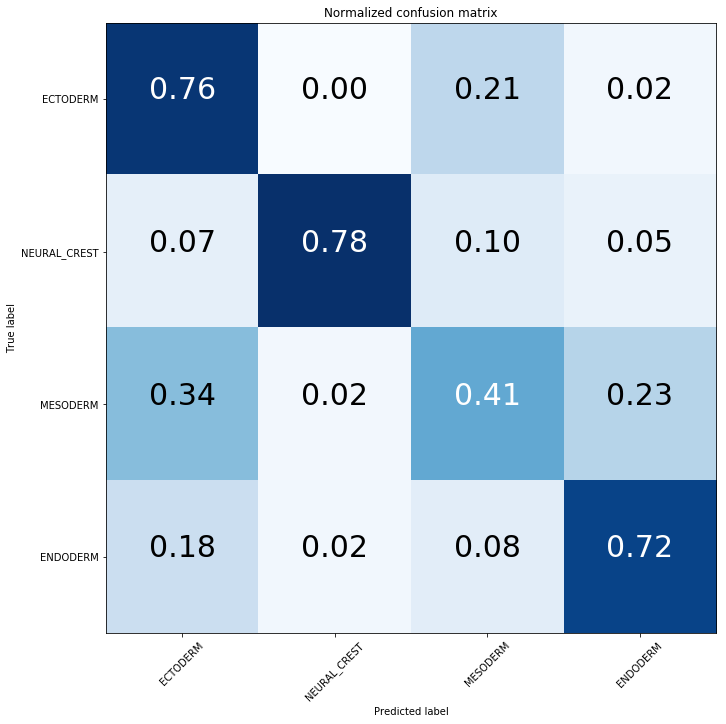

<Figure size 432x288 with 0 Axes>

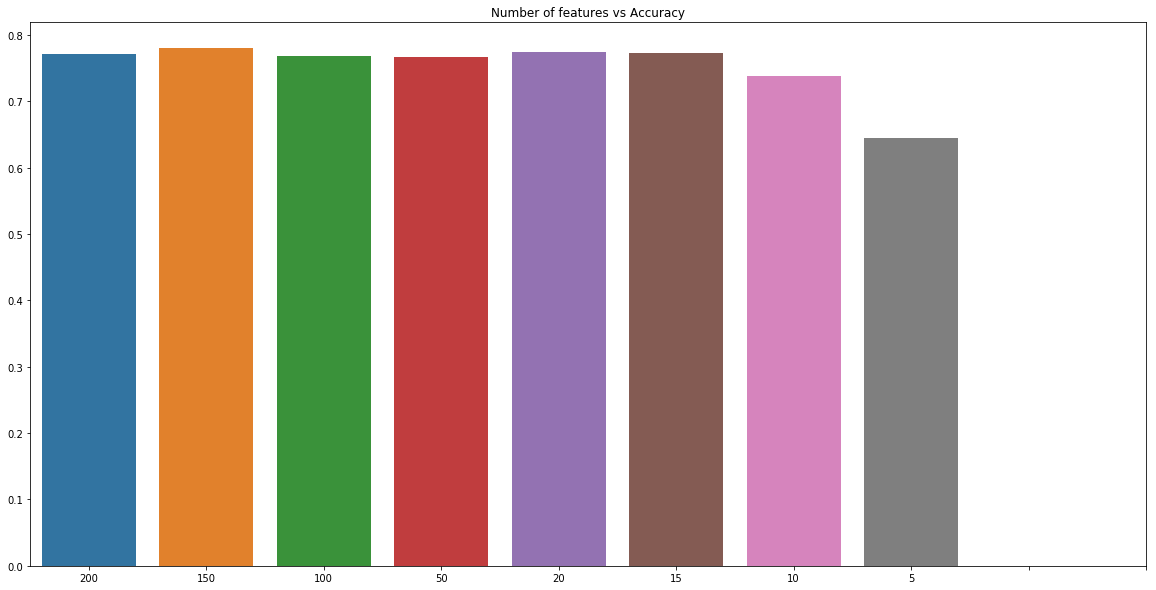

In [91]:
def perform_feature_selection(path,best_params,fi_dict,class_names=labels):
    D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
    num_features = [200,150,100,50,20,15,10,5]
    accuracies = []
    for num in num_features:
        print 'Number of features', num
        to_drop = np.array(D.keys())[num:]
        X_train, Y_train, X_test, Y_test = load_data(path)
        X_train = X_train.drop(to_drop,axis=1)
        X_test = X_test.drop(to_drop,axis=1)
        print(X_train.columns, X_train.shape)
        random_forest = RandomForestClassifier(**best_params)
        random_forest = random_forest.fit(X_train, Y_train)
        score = random_forest.score(X_test, Y_test)
        accuracies.append(score)
        print 'Random Forest', score
        y_test_pred = random_forest.predict(X_test)
        # Compute confusion matrix
        cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                              labels=class_names)
        print(cnf_matrix)

        # Plot normalized confusion matrix
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix', name=str(num))
    plt.figure(figsize=(20, 10))
    sns.barplot(range(len(num_features)), accuracies)
    plt.xticks(range(len(num_features)), num_features)
    plt.title('Number of features vs Accuracy')
    return num_features, accuracies
    
datasets = ['../../data_report/datasets/dataset_final.csv'] 
num_features, accuracies = perform_feature_selection(datasets[0],best_params,fi_dict)

# Feature selection with one vs all 

In [121]:
def voting_feature_selection_one_vs_all(dataset_file,k,best_params,features,name='best_one_vs_all'):
    # k= number of votations
    # Find the order of every feature
    importance_per_class = {}
    for class_name in labels:

        print 'One vs all ', class_name
        to_remove = [c for c in labels if c != class_name]

        df = pd.read_csv(dataset_file)
        df = df.replace(to_replace=to_remove, value='OTHER')
        print 'Preprocessing dataset:', dataset_file

        X_train, Y_train, X_test, Y_test = preprocessing(df)
    
        feature_importance = {feature:0 for feature in features}
        for i in range(k):
            if i%10==0:
                print i
            random_forest = RandomForestClassifier(**best_params)
            random_forest = random_forest.fit(X_train, Y_train)
            local_fi = np.array(pd.DataFrame(random_forest.feature_importances_,
                                           index=X_train.columns,
                                           columns=['importance']).sort_values('importance', ascending=False).index)
            j = 1
            for feature in local_fi:
                feature_importance[feature] += j
                j +=1
        D = OrderedDict((k, v) for k, v in sorted(feature_importance.iteritems(), key=lambda kv: kv[1]))
        print D.items()[:15]
        plt.figure(figsize=(20, 10))
        size = 15
        sns.barplot(range(size), np.array(D.values())[:size]/k)
        plt.xticks(range(size), list(D.keys())[:size], rotation=40)
        plt.title('Best  15 features mean positions')
        plt.show()
        plt.savefig(DATAPATH + '/plots/feature_importance/' + 'feature_importance_' + class_name + '.png',bbox_inches='tight')
        importance_per_class[class_name] = D
    
    return importance_per_class

One vs all  ECTODERM
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
0
10
20
30
40


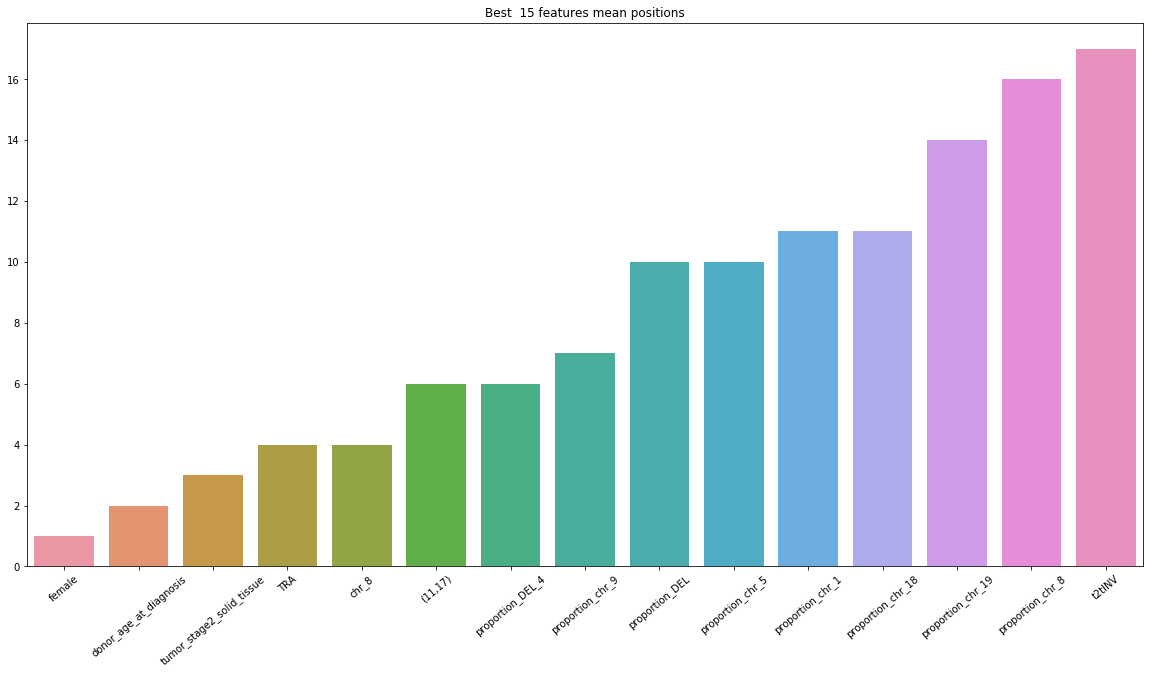

One vs all  NEURAL_CREST
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
0
10
20
30
40


<Figure size 432x288 with 0 Axes>

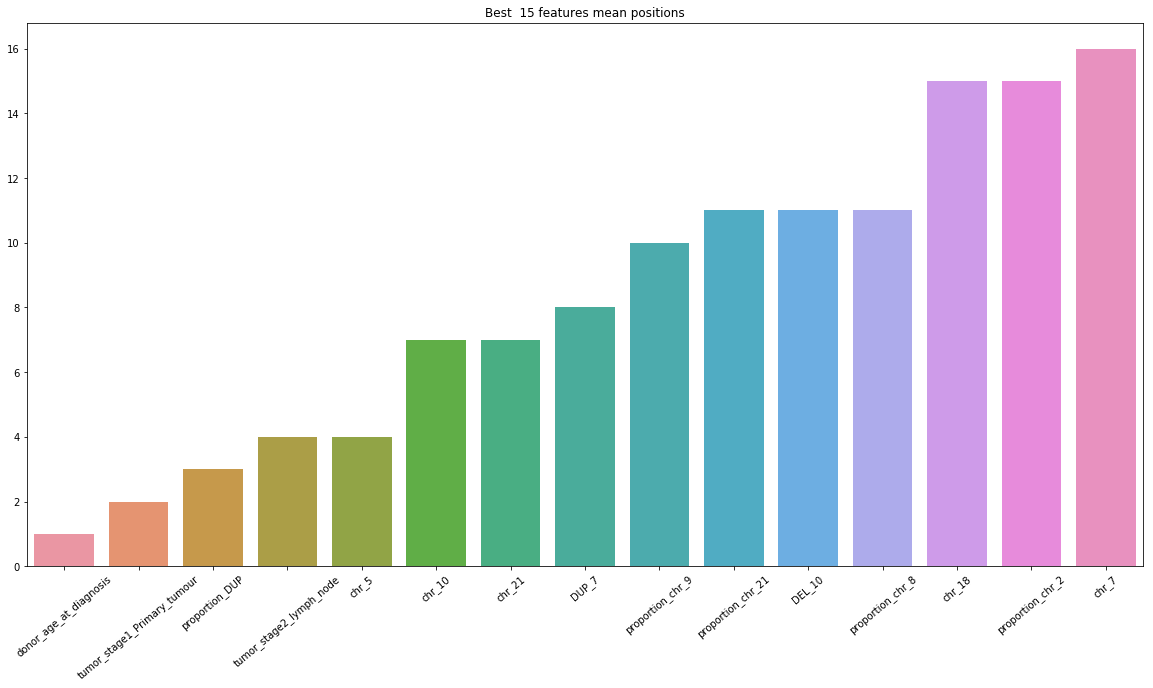

One vs all  MESODERM
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
0
10
20
30
40


<Figure size 432x288 with 0 Axes>

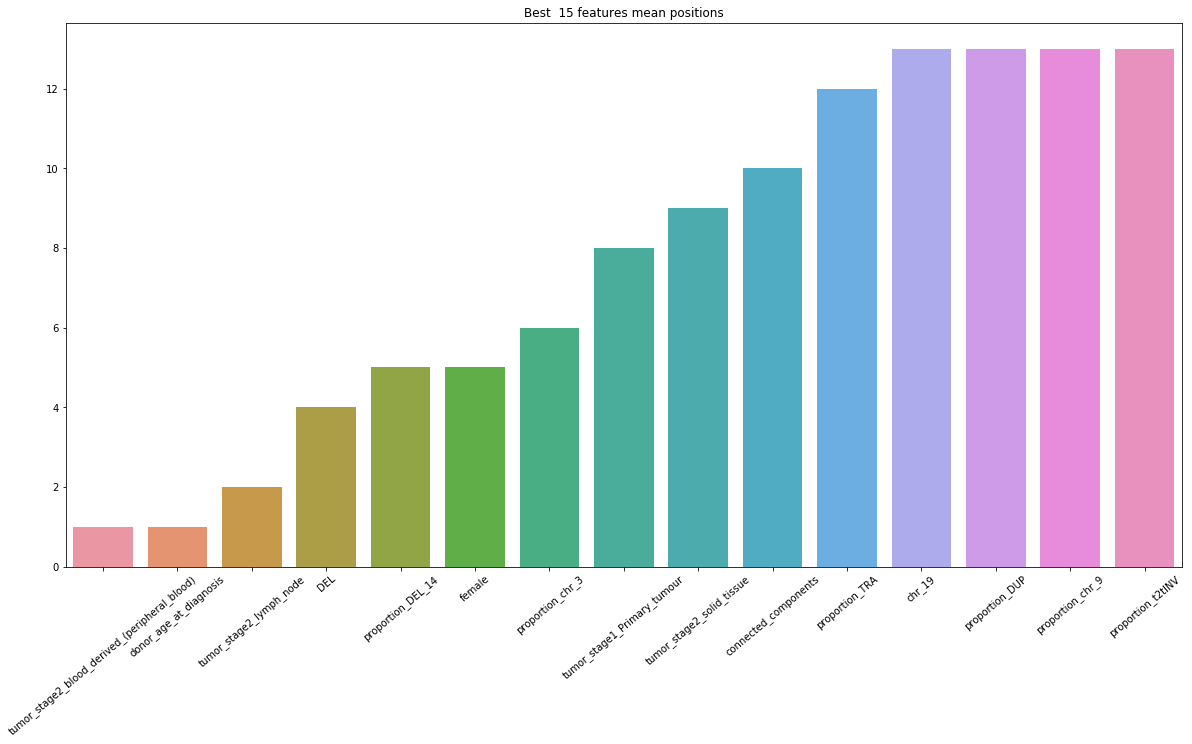

One vs all  ENDODERM
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
0
10
20
30
40


<Figure size 432x288 with 0 Axes>

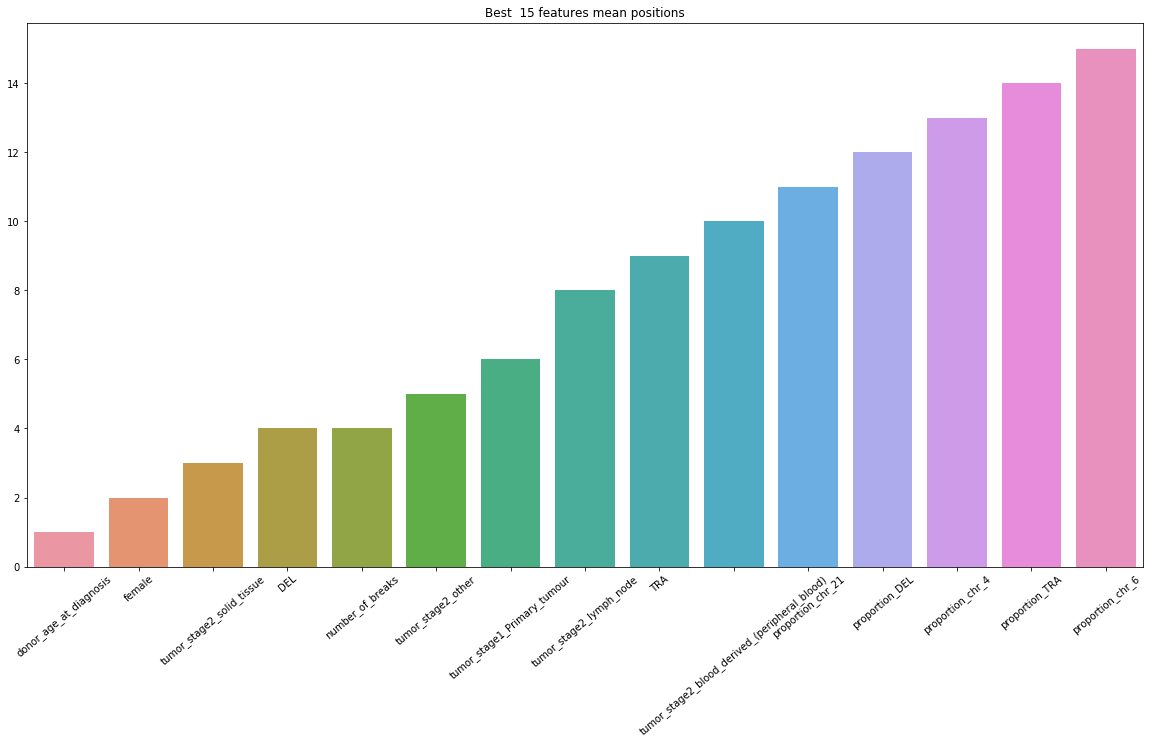

time: 0:33:11.193544


<Figure size 432x288 with 0 Axes>

In [122]:
init = time.time()
fi_dict_one_vs_all = voting_feature_selection_one_vs_all(datasets[0],50,best_params,features)
print'time:', timedelta(seconds=time.time() - init)

In [126]:
for class_name in labels:
        print class_name
        D = fi_dict_one_vs_all[class_name]
        print(np.array(D.items())[:size])

ECTODERM
[['female' '50']
 ['donor_age_at_diagnosis' '100']
 ['tumor_stage2_solid_tissue' '150']
 ['TRA' '233']
 ['chr_8' '235']
 ['(11,17)' '301']
 ['proportion_DEL_4' '332']
 ['proportion_chr_9' '399']
 ['proportion_DEL' '517']
 ['proportion_chr_5' '546']
 ['proportion_chr_1' '557']
 ['proportion_chr_18' '588']
 ['proportion_chr_19' '748']
 ['proportion_chr_8' '802']
 ['t2tINV' '857']]
NEURAL_CREST
[['donor_age_at_diagnosis' '50']
 ['tumor_stage1_Primary_tumour' '100']
 ['proportion_DUP' '150']
 ['tumor_stage2_lymph_node' '201']
 ['chr_5' '249']
 ['chr_10' '369']
 ['chr_21' '373']
 ['DUP_7' '400']
 ['proportion_chr_9' '514']
 ['proportion_chr_21' '587']
 ['DEL_10' '593']
 ['proportion_chr_8' '596']
 ['chr_18' '779']
 ['proportion_chr_2' '794']
 ['chr_7' '801']]
MESODERM
[['tumor_stage2_blood_derived_(peripheral_blood)' '69']
 ['donor_age_at_diagnosis' '85']
 ['tumor_stage2_lymph_node' '146']
 ['DEL' '211']
 ['proportion_DEL_14' '254']
 ['female' '298']
 ['proportion_chr_3' '337']
 ['

ECTODERM
Number of features 200
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,11)', u'(1,12)', u'(1,14)', u'(1,19)', u'(1,5)', u'(1,6)',
       u'(1,7)', u'(1,8)', u'(1,9)', u'(1,X)',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=200), (2068, 200))
Random Forest 0.915057915057915
[[ 17  25]
 [ 19 457]]


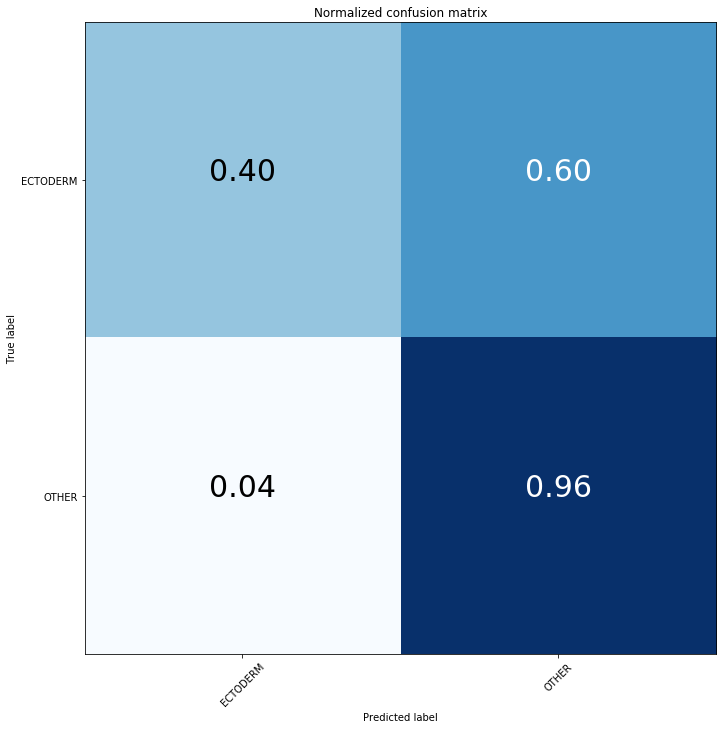

Number of features 150
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,12)', u'(1,6)', u'(1,8)', u'(1,9)', u'(11,12)', u'(11,14)',
       u'(11,17)', u'(12,17)', u'(12,18)', u'(12,19)',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=150), (2068, 150))
Random Forest 0.9208494208494209
[[ 21  21]
 [ 20 456]]


<Figure size 432x288 with 0 Axes>

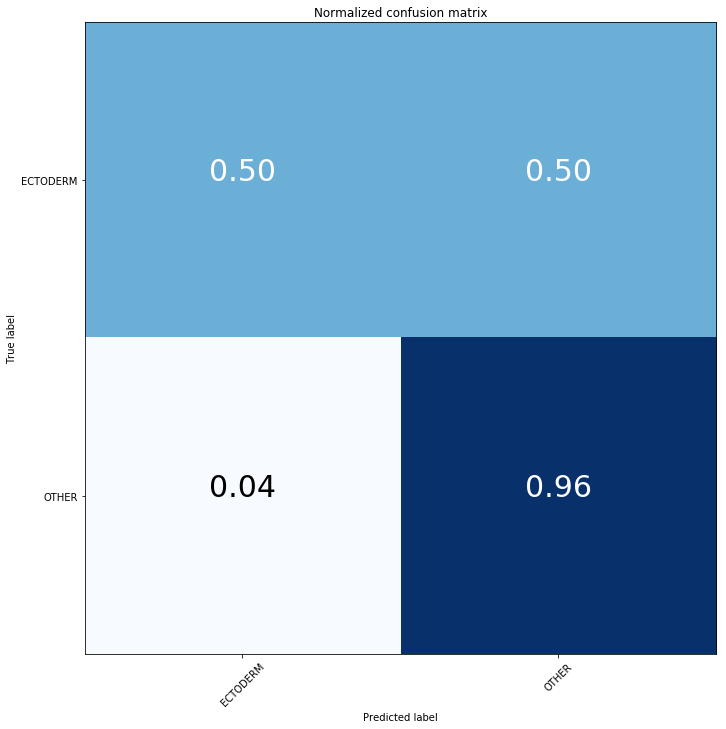

Number of features 100
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,6)', u'(1,8)', u'(11,17)', u'(12,18)', u'(12,19)', u'(2,7)',
       u'(5,12)', u'donor_age_at_diagnosis', u'chr_1', u'DEL_1', u'chr_4',
       u'DEL_4', u'chr_5', u'chr_6', u'chr_7', u'chr_8', u'DEL_8', u'chr_9',
       u'chr_10', u'chr_11', u'chr_12', u'chr_17', u'DEL_17', u'chr_18',
       u'chr_19', u'DUP', u'DEL', u'TRA', u'h2hINV', u't2tINV',
       u'number_of_breaks', u'female', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_1', u'proportion_DEL_1',
       u'proportion_DUP_1', u'proportion_chr_2', u'proportion_DEL_2',
       u'proportion_DUP_2', u'proportion_chr_3', u'proportion_DEL_3',
       u'proportion_DUP_3', u'proportion_chr_4', u'proportion_DEL_4',
       u'proportion_DUP_4', u'proportion_chr_5', u'proportion_DEL_5',
       u'proportion_DUP_5', u'proportion_chr_6', u'proportion_DEL_6',
       u'proportion_DUP_6', u'proportion_chr_7', u'prop

<Figure size 432x288 with 0 Axes>

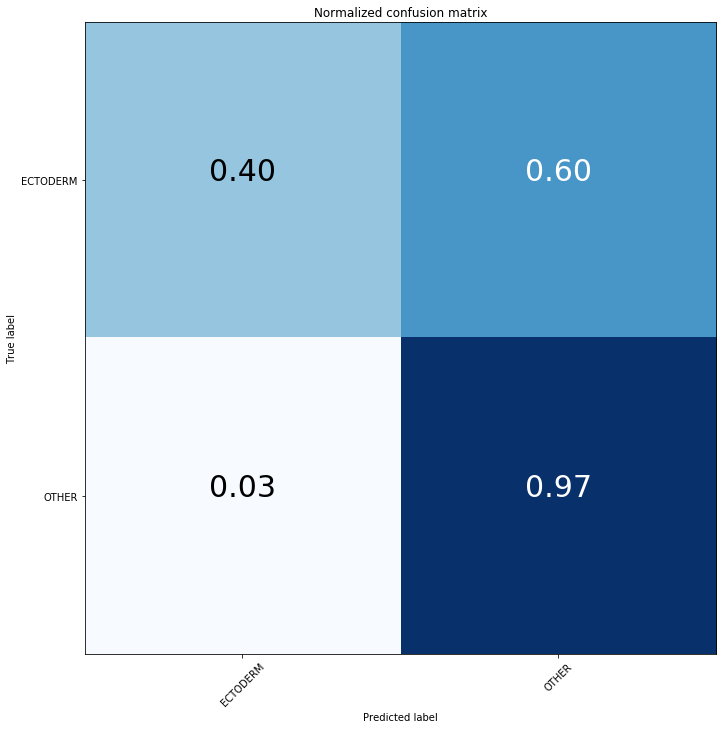

Number of features 50
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(11,17)', u'donor_age_at_diagnosis', u'chr_8', u'DEL_17', u'DEL',
       u'TRA', u't2tINV', u'number_of_breaks', u'female',
       u'tumor_stage2_other', u'tumor_stage2_solid_tissue',
       u'proportion_chr_1', u'proportion_DEL_1', u'proportion_chr_2',
       u'proportion_chr_3', u'proportion_DEL_3', u'proportion_DUP_3',
       u'proportion_chr_4', u'proportion_DEL_4', u'proportion_chr_5',
       u'proportion_DEL_5', u'proportion_DUP_5', u'proportion_chr_6',
       u'proportion_chr_7', u'proportion_DEL_7', u'proportion_chr_8',
       u'proportion_DUP_8', u'proportion_chr_9', u'proportion_DEL_9',
       u'proportion_DUP_9', u'proportion_DEL_11', u'proportion_chr_12',
       u'proportion_DEL_12', u'proportion_DUP_12', u'proportion_chr_13',
       u'proportion_chr_14', u'proportion_chr_15', u'proportion_chr_17',
       u'proportion_DEL_17', u'proportion_chr_18', u'proportion_DEL_18',
     

<Figure size 432x288 with 0 Axes>

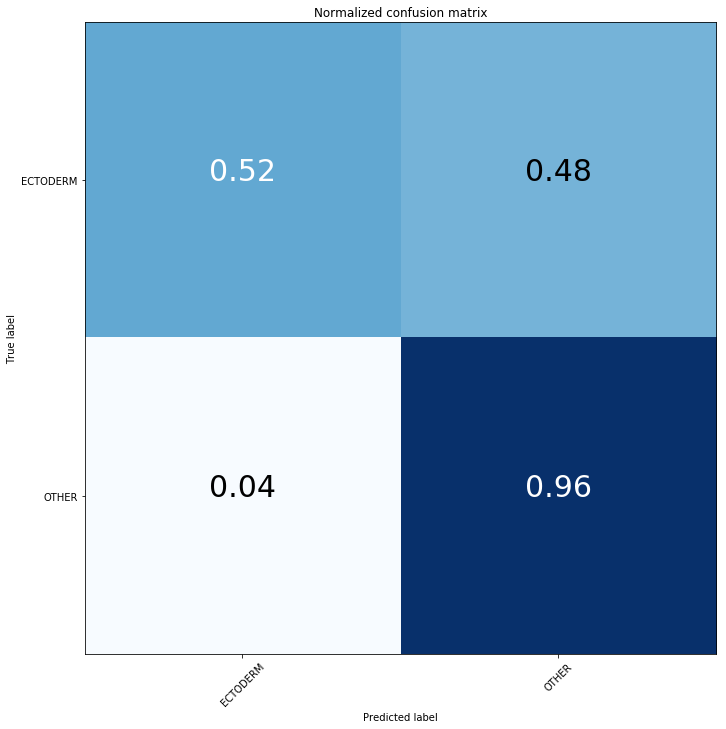

Number of features 20
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(11,17)', u'donor_age_at_diagnosis', u'chr_8', u'DEL_17', u'TRA',
       u't2tINV', u'female', u'tumor_stage2_solid_tissue', u'proportion_chr_1',
       u'proportion_DEL_4', u'proportion_chr_5', u'proportion_DEL_5',
       u'proportion_chr_7', u'proportion_chr_8', u'proportion_chr_9',
       u'proportion_chr_18', u'proportion_chr_19', u'proportion_DUP_X',
       u'proportion_DEL', u'proportion_TRA'],
      dtype='object'), (2068, 20))
Random Forest 0.916988416988417
[[ 22  20]
 [ 23 453]]


<Figure size 432x288 with 0 Axes>

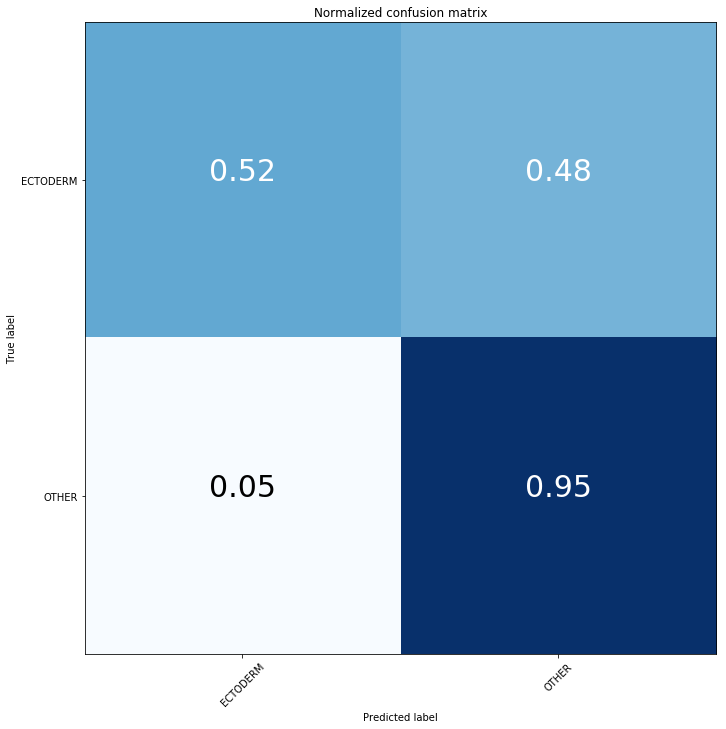

Number of features 15
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(11,17)', u'donor_age_at_diagnosis', u'chr_8', u'TRA', u't2tINV',
       u'female', u'tumor_stage2_solid_tissue', u'proportion_chr_1',
       u'proportion_DEL_4', u'proportion_chr_5', u'proportion_chr_8',
       u'proportion_chr_9', u'proportion_chr_18', u'proportion_chr_19',
       u'proportion_DEL'],
      dtype='object'), (2068, 15))
Random Forest 0.915057915057915
[[ 23  19]
 [ 25 451]]


<Figure size 432x288 with 0 Axes>

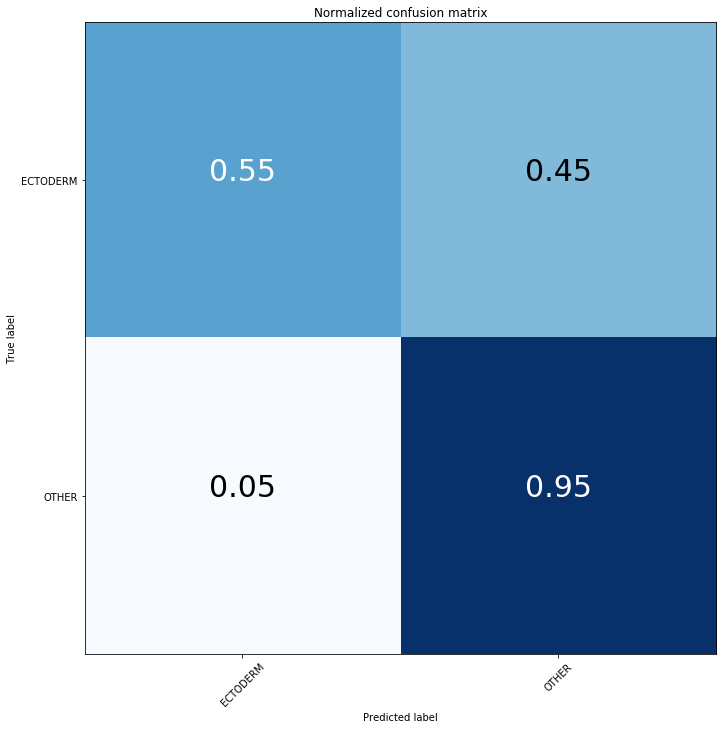

Number of features 10
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(11,17)', u'donor_age_at_diagnosis', u'chr_8', u'TRA', u'female',
       u'tumor_stage2_solid_tissue', u'proportion_DEL_4', u'proportion_chr_5',
       u'proportion_chr_9', u'proportion_DEL'],
      dtype='object'), (2068, 10))
Random Forest 0.8996138996138996
[[ 24  18]
 [ 34 442]]


<Figure size 432x288 with 0 Axes>

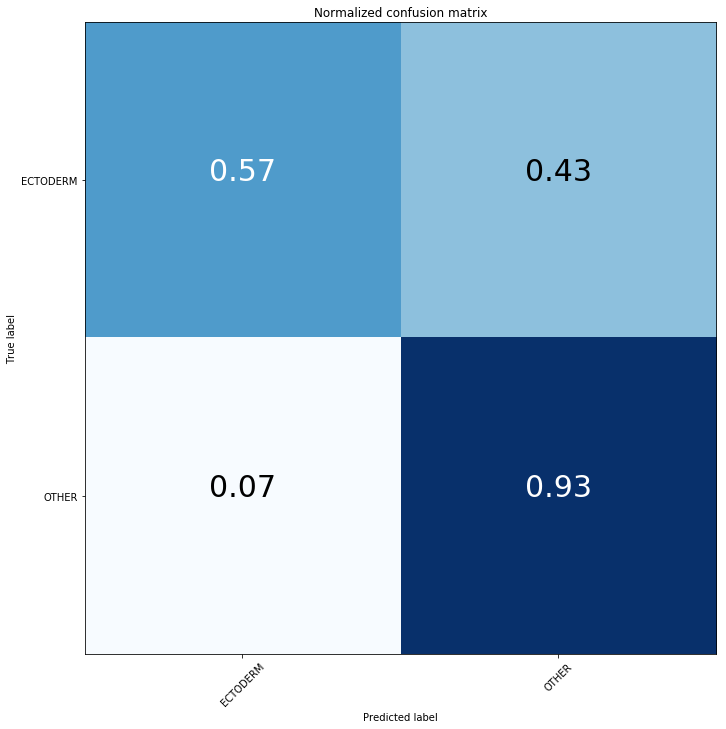

Number of features 5
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'chr_8', u'TRA', u'female',
       u'tumor_stage2_solid_tissue'],
      dtype='object'), (2068, 5))
Random Forest 0.8822393822393823
[[ 20  22]
 [ 39 437]]


<Figure size 432x288 with 0 Axes>

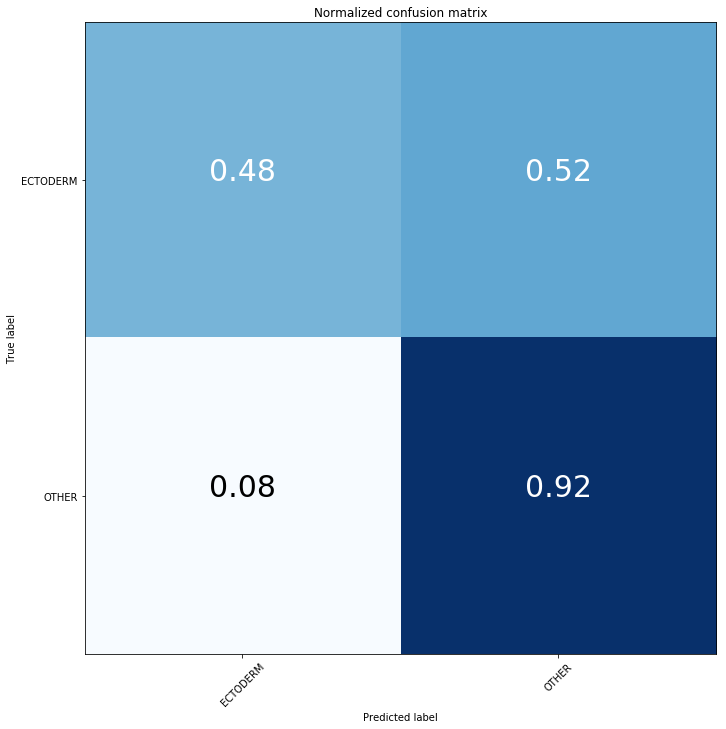

NEURAL_CREST
Number of features 200
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,10)', u'(1,11)', u'(1,12)', u'(1,19)', u'(1,21)', u'(1,6)',
       u'(1,7)', u'(1,8)', u'(10,12)', u'(10,20)',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=200), (2068, 200))
Random Forest 0.9575289575289575
[[ 62  12]
 [ 10 434]]


<Figure size 432x288 with 0 Axes>

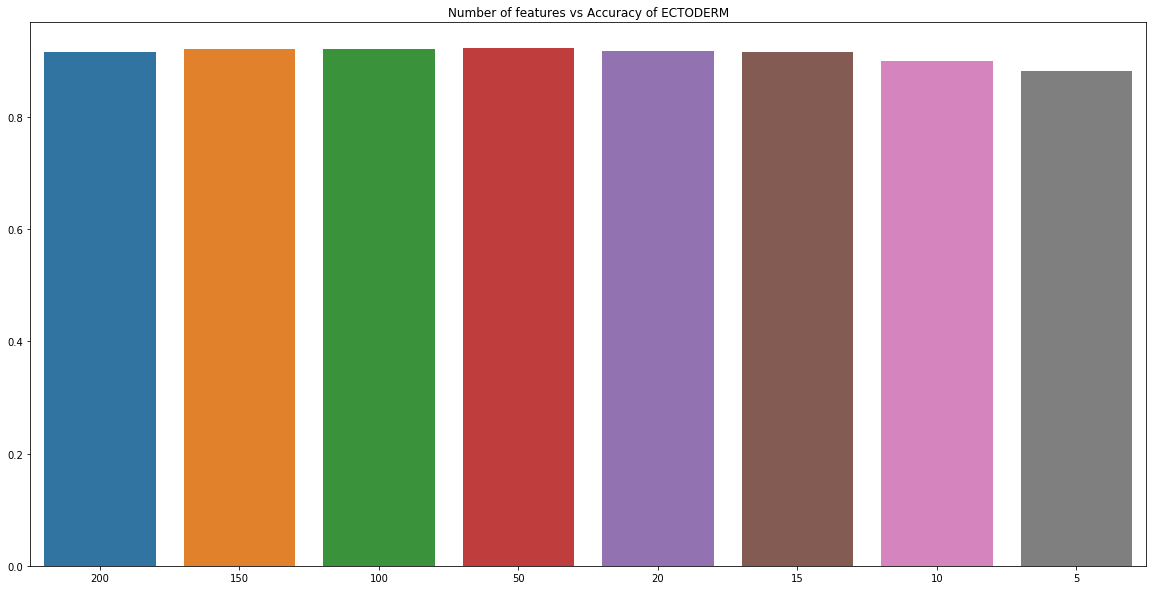

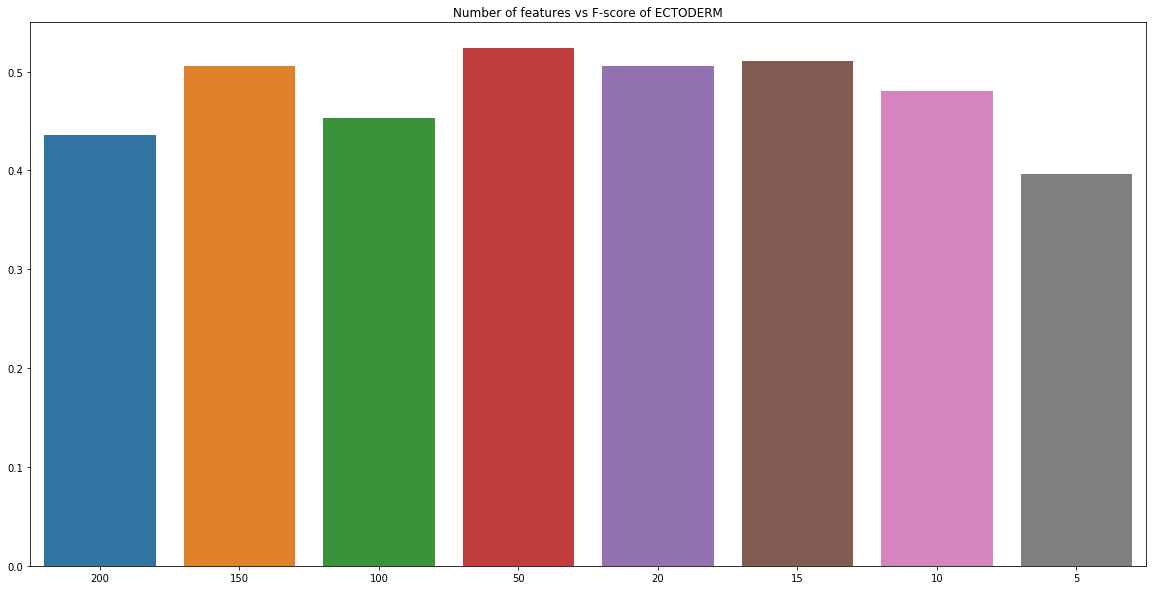

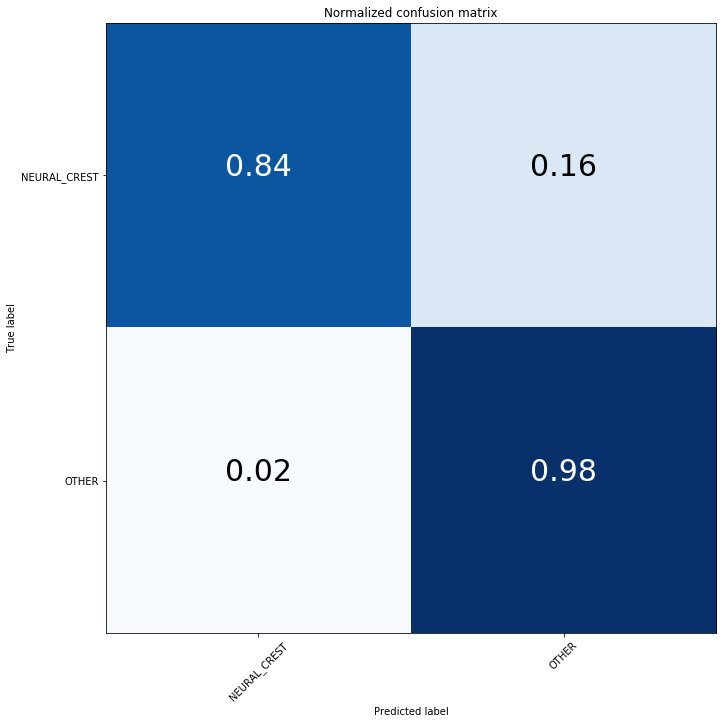

Number of features 150
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,12)', u'(1,7)', u'(1,8)', u'(10,20)', u'(17,18)', u'(2,15)',
       u'(2,21)', u'(2,4)', u'(3,11)', u'(6,10)',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=150), (2068, 150))
Random Forest 0.9575289575289575
[[ 63  11]
 [ 11 433]]


<Figure size 432x288 with 0 Axes>

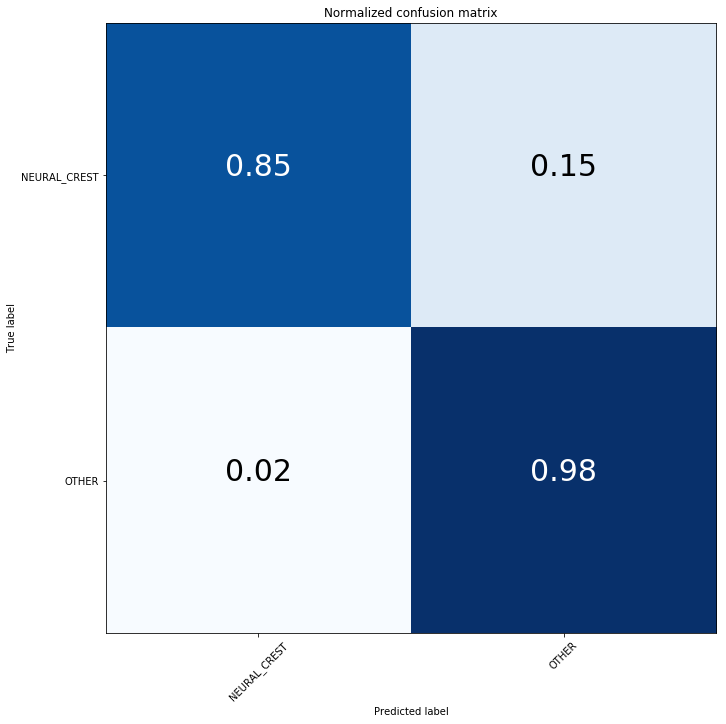

Number of features 100
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(10,20)', u'(17,18)', u'(3,11)', u'(6,10)', u'donor_age_at_diagnosis',
       u'connected_components', u'connected_components_max_size', u'chr_1',
       u'DEL_1', u'chr_2', u'chr_3', u'chr_4', u'chr_5', u'chr_6', u'DUP_6',
       u'chr_7', u'DEL_7', u'DUP_7', u'chr_8', u'DEL_8', u'chr_9', u'chr_10',
       u'DEL_10', u'DUP_10', u'chr_11', u'chr_12', u'DUP_12', u'chr_13',
       u'chr_14', u'chr_18', u'chr_21', u'DEL_22', u'chr_X', u'DUP', u'DEL',
       u'TRA', u'h2hINV', u't2tINV', u'number_of_breaks', u'female',
       u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(bone_marrow)', u'tumor_stage2_lymph_node',
       u'tumor_stage2_other', u'tumor_stage2_solid_tissue',
       u'proportion_chr_1', u'proportion_DEL_1', u'proportion_DUP_1',
       u'proportion_chr_2', u'proportion_DEL_2', u'proportion_DUP_2',
       u'proportion_chr_3', u'proportion_DEL_3', u'proporti

<Figure size 432x288 with 0 Axes>

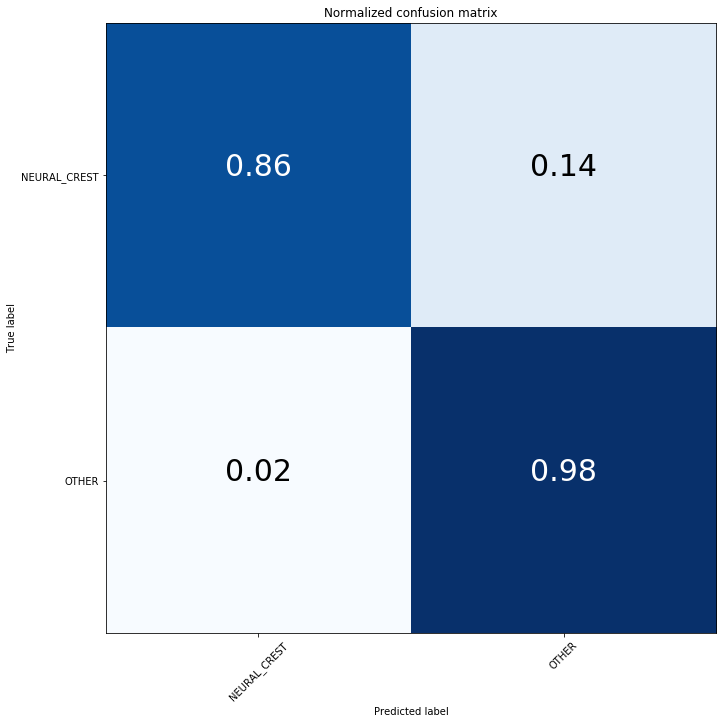

Number of features 50
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'chr_1', u'chr_3', u'chr_5', u'chr_6',
       u'chr_7', u'DUP_7', u'chr_8', u'chr_10', u'DEL_10', u'DUP_10',
       u'chr_11', u'chr_18', u'chr_21', u'DUP', u'TRA', u'number_of_breaks',
       u'tumor_stage1_Primary_tumour', u'tumor_stage2_lymph_node',
       u'tumor_stage2_solid_tissue', u'proportion_chr_1', u'proportion_DEL_1',
       u'proportion_chr_2', u'proportion_chr_3', u'proportion_DEL_3',
       u'proportion_chr_4', u'proportion_chr_5', u'proportion_chr_6',
       u'proportion_DEL_6', u'proportion_chr_7', u'proportion_DUP_7',
       u'proportion_chr_8', u'proportion_DEL_8', u'proportion_chr_9',
       u'proportion_DUP_9', u'proportion_chr_10', u'proportion_chr_11',
       u'proportion_chr_12', u'proportion_DUP_12', u'proportion_DEL_14',
       u'proportion_DEL_16', u'proportion_chr_18', u'proportion_chr_19',
       u'proportion_chr_21', u'proportion_DE

<Figure size 432x288 with 0 Axes>

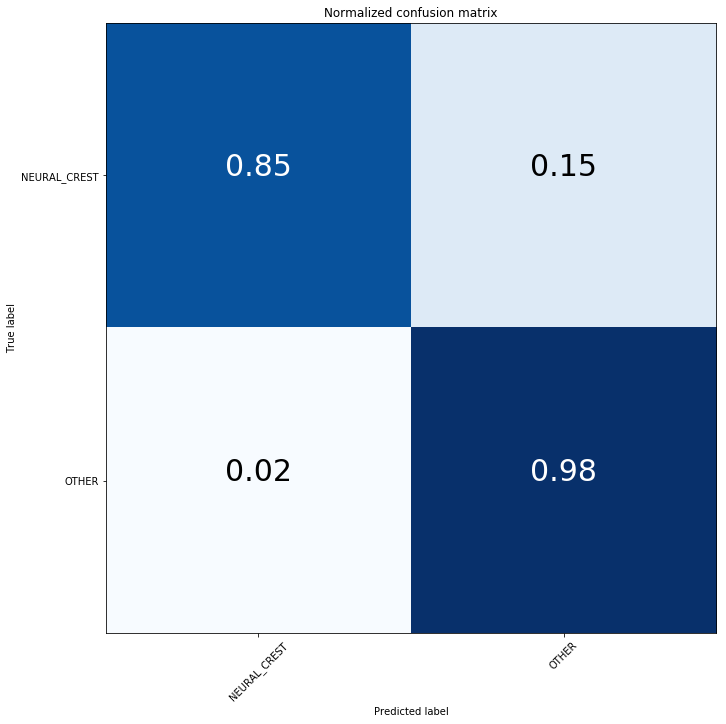

Number of features 20
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'chr_5', u'chr_6', u'chr_7', u'DUP_7',
       u'chr_8', u'chr_10', u'DEL_10', u'chr_18', u'chr_21',
       u'tumor_stage1_Primary_tumour', u'tumor_stage2_lymph_node',
       u'tumor_stage2_solid_tissue', u'proportion_chr_2', u'proportion_chr_6',
       u'proportion_chr_8', u'proportion_chr_9', u'proportion_chr_21',
       u'proportion_DUP', u'proportion_DEL'],
      dtype='object'), (2068, 20))
Random Forest 0.9594594594594594
[[ 64  10]
 [ 11 433]]


<Figure size 432x288 with 0 Axes>

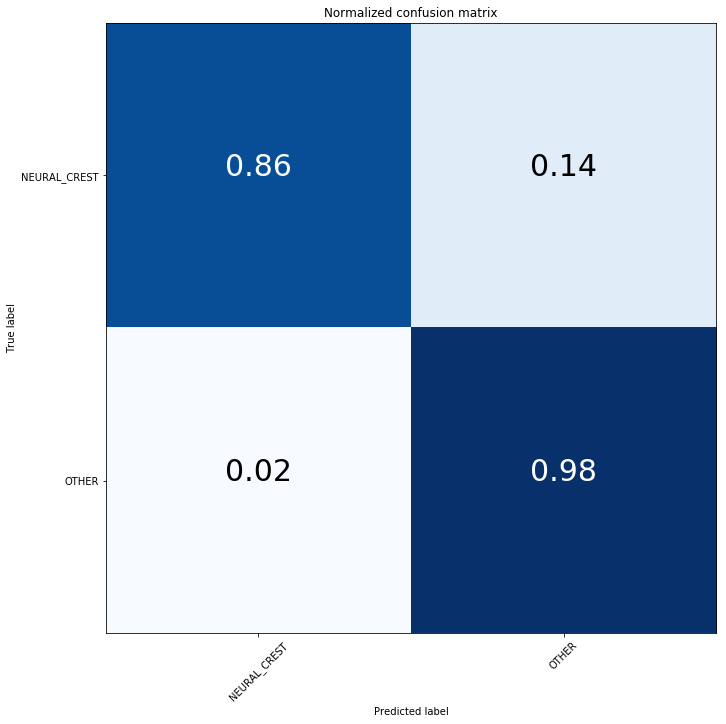

Number of features 15
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'chr_5', u'chr_7', u'DUP_7', u'chr_10',
       u'DEL_10', u'chr_18', u'chr_21', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_lymph_node', u'proportion_chr_2', u'proportion_chr_8',
       u'proportion_chr_9', u'proportion_chr_21', u'proportion_DUP'],
      dtype='object'), (2068, 15))
Random Forest 0.9555984555984556
[[ 65   9]
 [ 14 430]]


<Figure size 432x288 with 0 Axes>

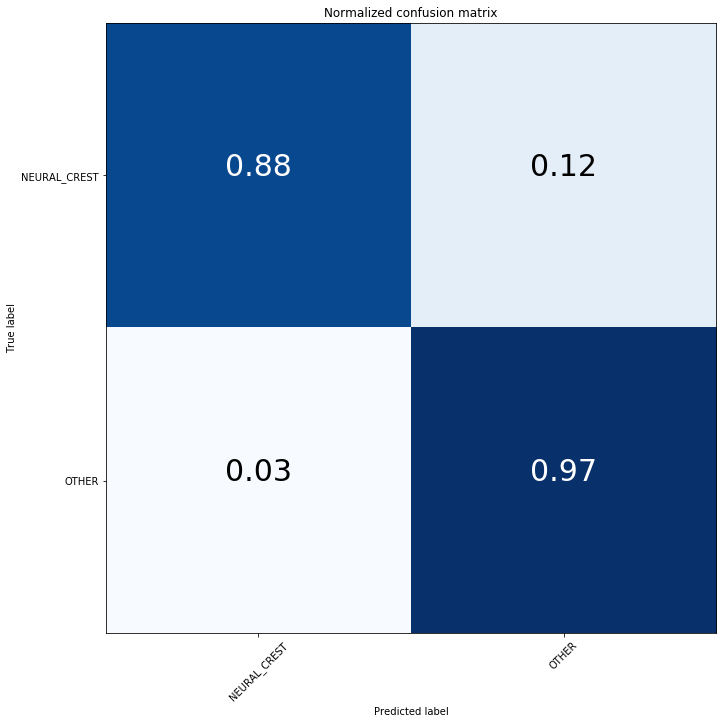

Number of features 10
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'chr_5', u'DUP_7', u'chr_10', u'chr_21',
       u'tumor_stage1_Primary_tumour', u'tumor_stage2_lymph_node',
       u'proportion_chr_9', u'proportion_chr_21', u'proportion_DUP'],
      dtype='object'), (2068, 10))
Random Forest 0.9536679536679536
[[ 64  10]
 [ 14 430]]


<Figure size 432x288 with 0 Axes>

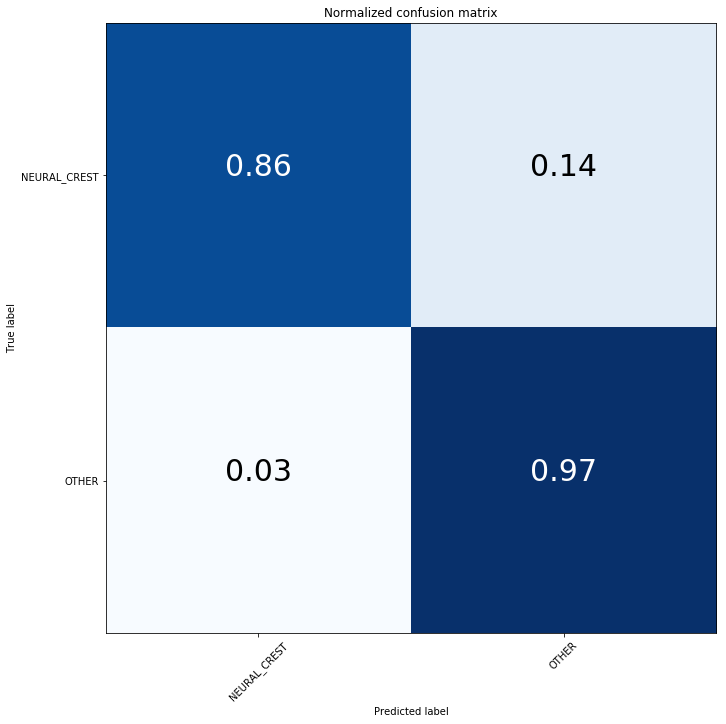

Number of features 5
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'chr_5', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_lymph_node', u'proportion_DUP'],
      dtype='object'), (2068, 5))
Random Forest 0.9594594594594594
[[ 67   7]
 [ 14 430]]


<Figure size 432x288 with 0 Axes>

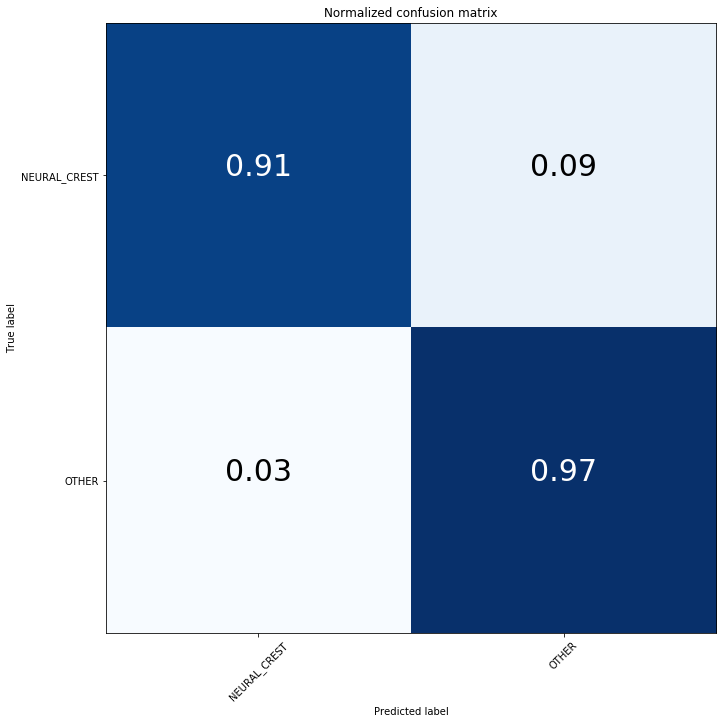

MESODERM
Number of features 200
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,11)', u'(1,12)', u'(1,13)', u'(1,2)', u'(1,3)', u'(1,5)', u'(1,9)',
       u'(10,19)', u'(11,16)', u'(12,17)',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=200), (2068, 200))
Random Forest 0.7953667953667953
[[ 74  72]
 [ 34 338]]


<Figure size 432x288 with 0 Axes>

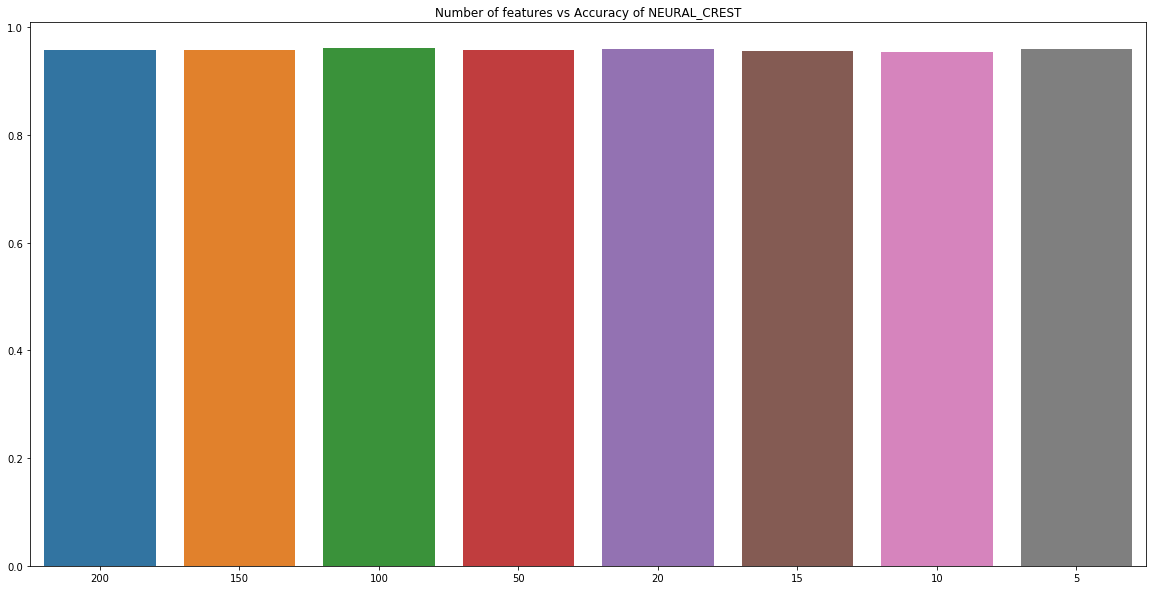

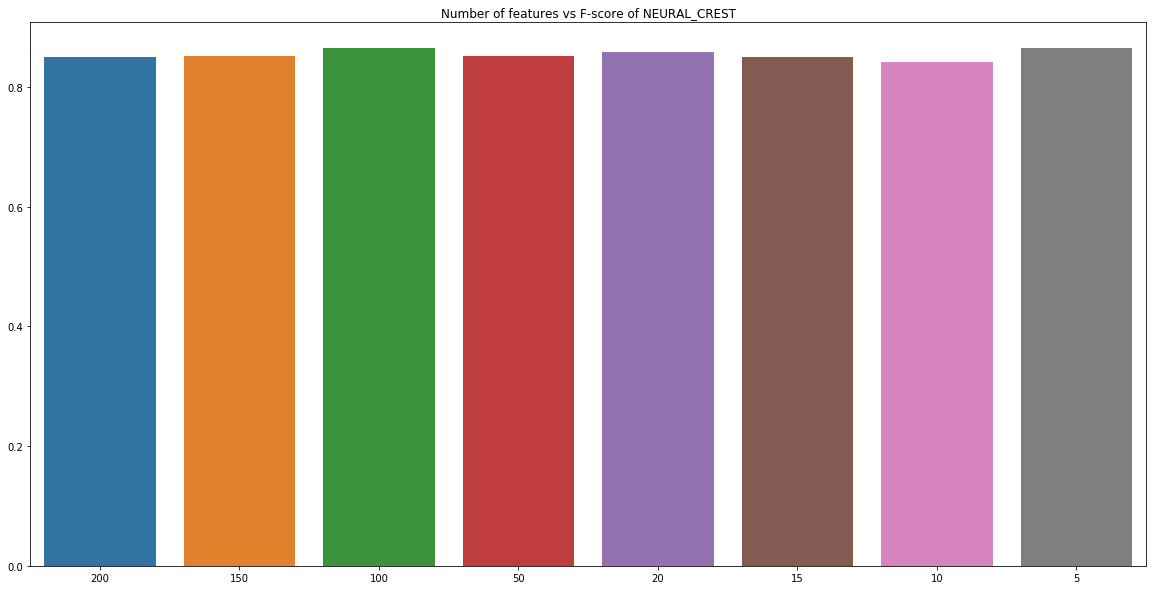

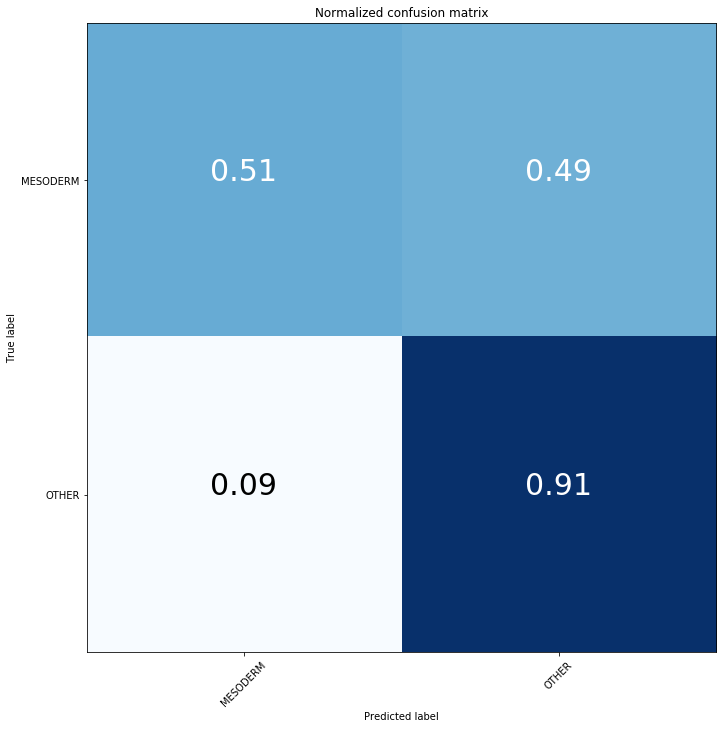

Number of features 150
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,12)', u'(1,3)', u'(18,22)', u'(3,5)', u'(3,8)', u'(4,7)', u'(5,8)',
       u'donor_age_at_diagnosis', u'connected_components',
       u'connected_components_max_size',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=150), (2068, 150))
Random Forest 0.803088803088803
[[ 75  71]
 [ 31 341]]


<Figure size 432x288 with 0 Axes>

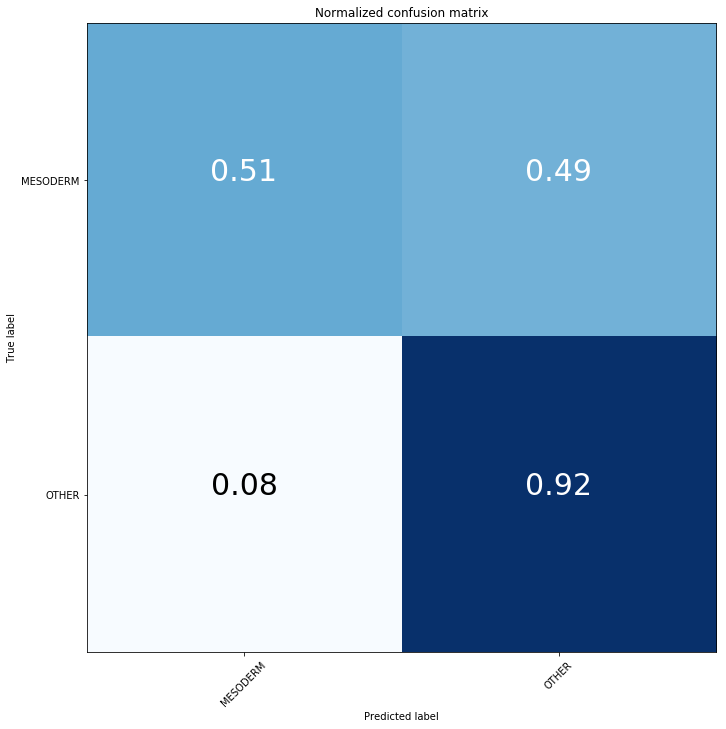

Number of features 100
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(3,5)', u'donor_age_at_diagnosis', u'connected_components',
       u'connected_components_max_size', u'chr_1', u'chr_2', u'chr_3',
       u'chr_5', u'chr_6', u'chr_7', u'chr_8', u'chr_9', u'chr_10', u'chr_11',
       u'DEL_11', u'chr_12', u'DUP_12', u'chr_14', u'DEL_14', u'chr_16',
       u'chr_17', u'DUP_17', u'chr_19', u'chr_X', u'DUP', u'DEL', u'TRA',
       u'h2hINV', u't2tINV', u'number_of_breaks', u'female',
       u'tumor_stage1_Metastatic_tumour', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(bone_marrow)',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_solid_tissue',
       u'proportion_chr_1', u'proportion_DEL_1', u'proportion_DUP_1',
       u'proportion_chr_2', u'proportion_DEL_2', u'proportion_DUP_2',
       u'proportion_chr_3', u'proportion_DEL_3', u'proportion_DUP_3',
       u'proportion_chr

<Figure size 432x288 with 0 Axes>

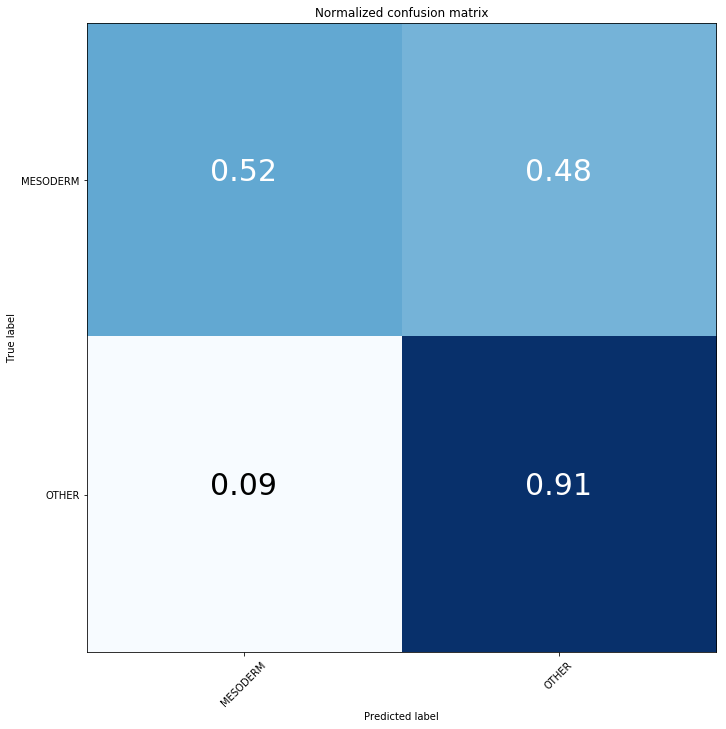

Number of features 50
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(3,5)', u'donor_age_at_diagnosis', u'connected_components',
       u'connected_components_max_size', u'chr_3', u'chr_19', u'DUP', u'DEL',
       u'TRA', u'number_of_breaks', u'female',
       u'tumor_stage1_Metastatic_tumour', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_solid_tissue',
       u'proportion_chr_1', u'proportion_chr_2', u'proportion_DEL_2',
       u'proportion_chr_3', u'proportion_chr_4', u'proportion_chr_5',
       u'proportion_DEL_5', u'proportion_chr_6', u'proportion_DEL_6',
       u'proportion_chr_7', u'proportion_DEL_7', u'proportion_chr_8',
       u'proportion_DEL_8', u'proportion_chr_9', u'proportion_DEL_9',
       u'proportion_chr_10', u'proportion_DEL_10', u'proportion_chr_11',
       u'proportion_DEL_11', u'proportion_chr_12', u'proportion_DEL_13',
       u'proportion_chr

<Figure size 432x288 with 0 Axes>

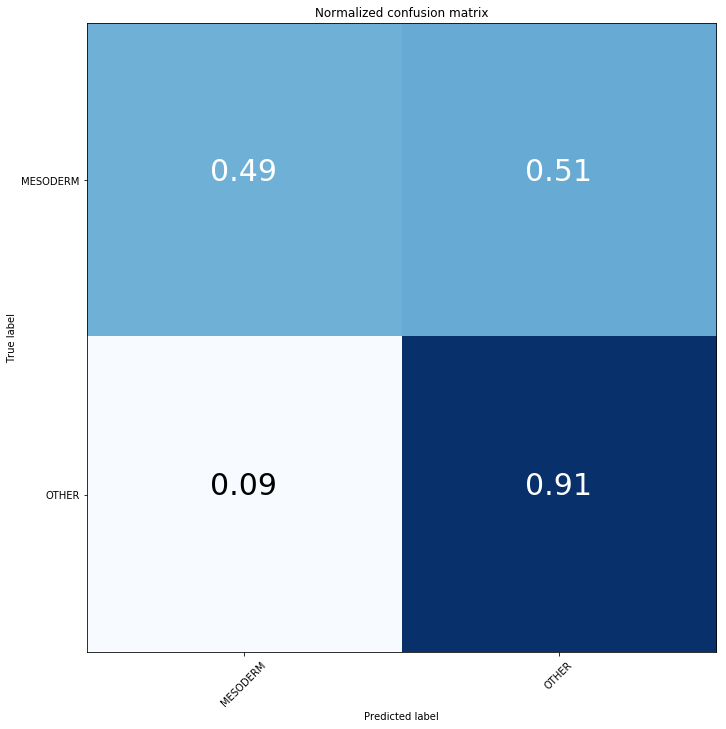

Number of features 20
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'connected_components', u'chr_19', u'DUP',
       u'DEL', u'number_of_breaks', u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_solid_tissue',
       u'proportion_chr_3', u'proportion_chr_7', u'proportion_chr_9',
       u'proportion_chr_14', u'proportion_DEL_14', u'proportion_chr_19',
       u'proportion_DUP', u'proportion_TRA', u'proportion_t2tINV'],
      dtype='object'), (2068, 20))
Random Forest 0.7876447876447876
[[ 79  67]
 [ 43 329]]


<Figure size 432x288 with 0 Axes>

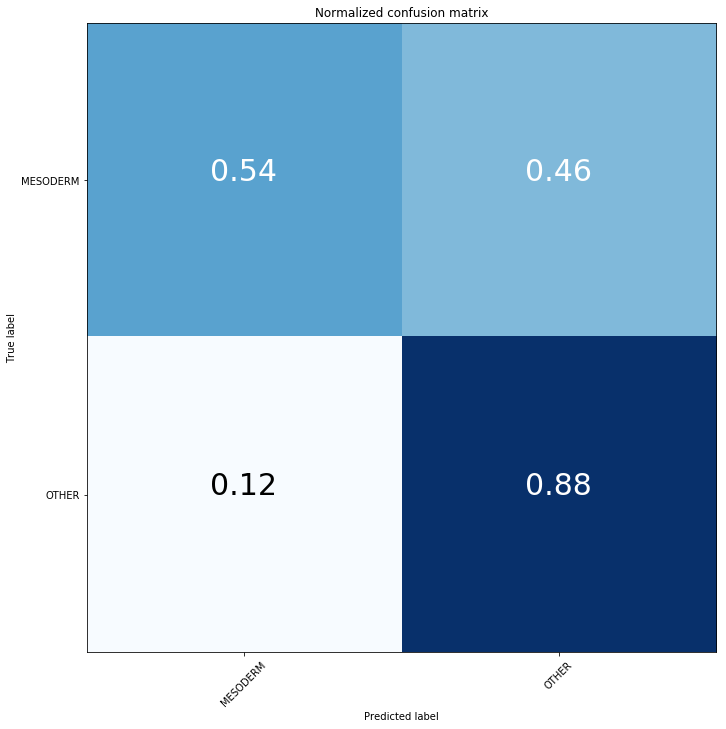

Number of features 15
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'connected_components', u'chr_19', u'DEL',
       u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_solid_tissue',
       u'proportion_chr_3', u'proportion_chr_9', u'proportion_DEL_14',
       u'proportion_DUP', u'proportion_TRA', u'proportion_t2tINV'],
      dtype='object'), (2068, 15))
Random Forest 0.7857142857142857
[[ 81  65]
 [ 46 326]]


<Figure size 432x288 with 0 Axes>

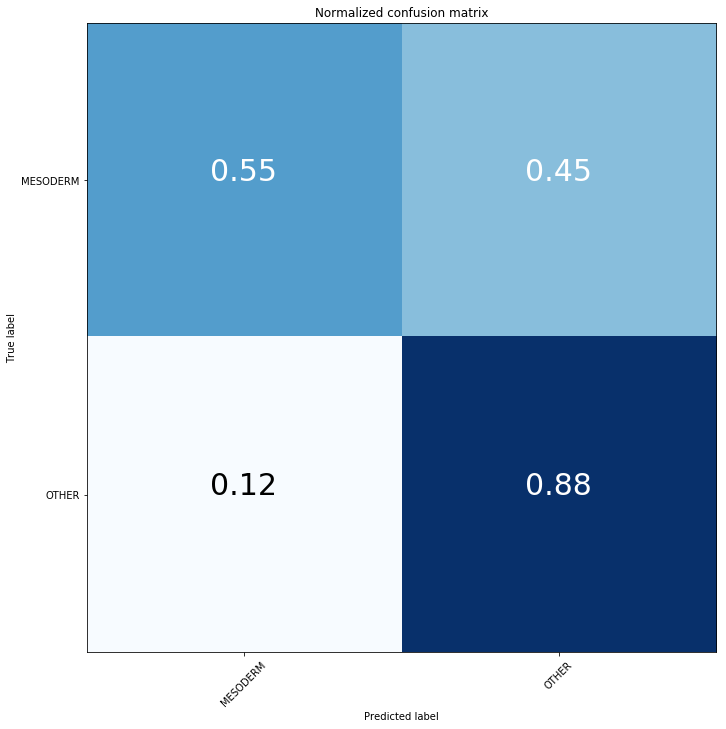

Number of features 10
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'connected_components', u'DEL', u'female',
       u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_solid_tissue',
       u'proportion_chr_3', u'proportion_DEL_14'],
      dtype='object'), (2068, 10))
Random Forest 0.7702702702702703
[[ 84  62]
 [ 57 315]]


<Figure size 432x288 with 0 Axes>

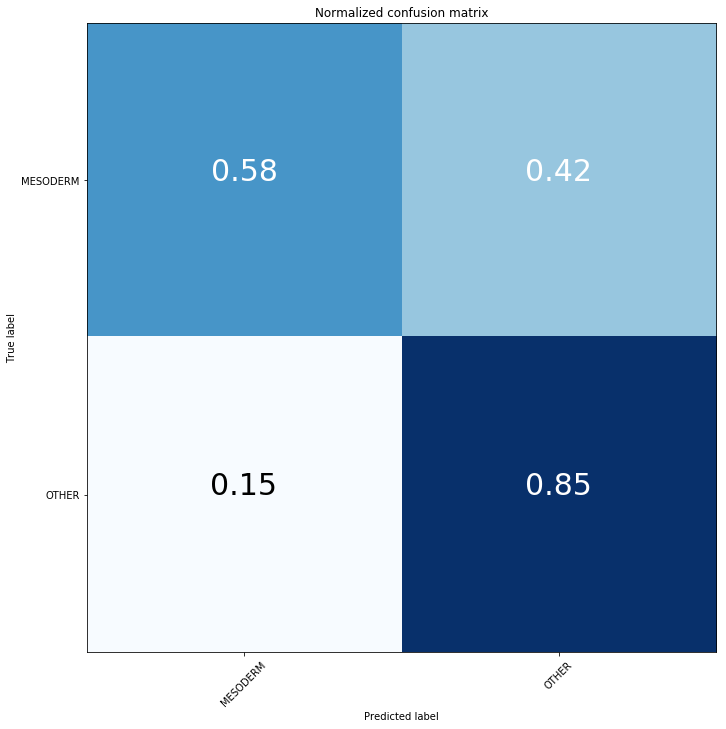

Number of features 5
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'DEL',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'proportion_DEL_14'],
      dtype='object'), (2068, 5))
Random Forest 0.722007722007722
[[ 70  76]
 [ 68 304]]


<Figure size 432x288 with 0 Axes>

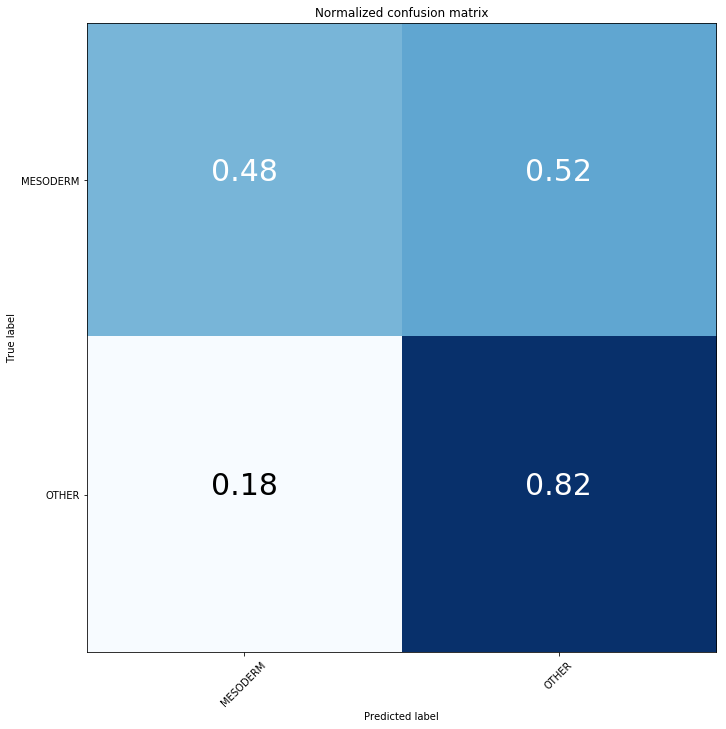

ENDODERM
Number of features 200
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(1,11)', u'(1,12)', u'(1,17)', u'(1,3)', u'(1,7)', u'(1,8)', u'(1,9)',
       u'(10,20)', u'(11,14)', u'(11,17)',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=200), (2068, 200))
Random Forest 0.832046332046332
[[218  39]
 [ 48 213]]


<Figure size 432x288 with 0 Axes>

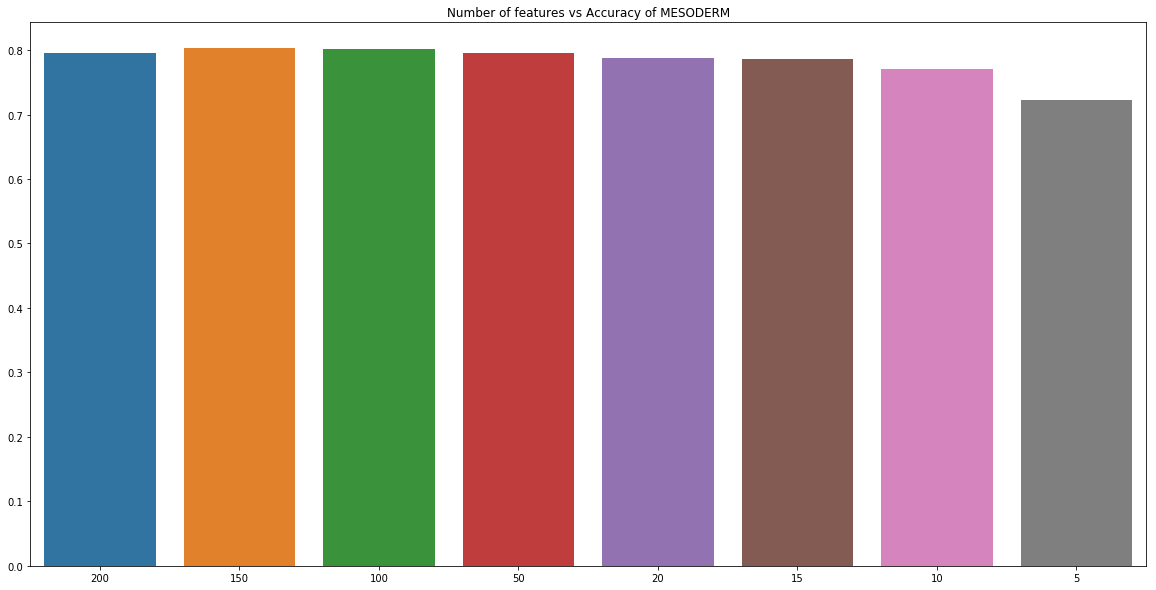

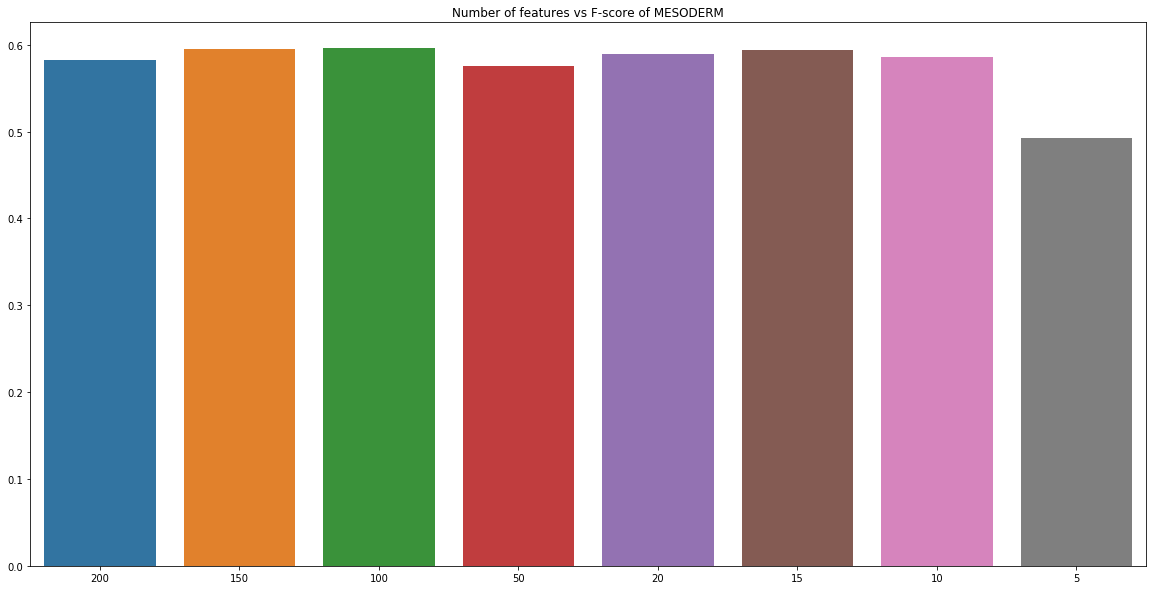

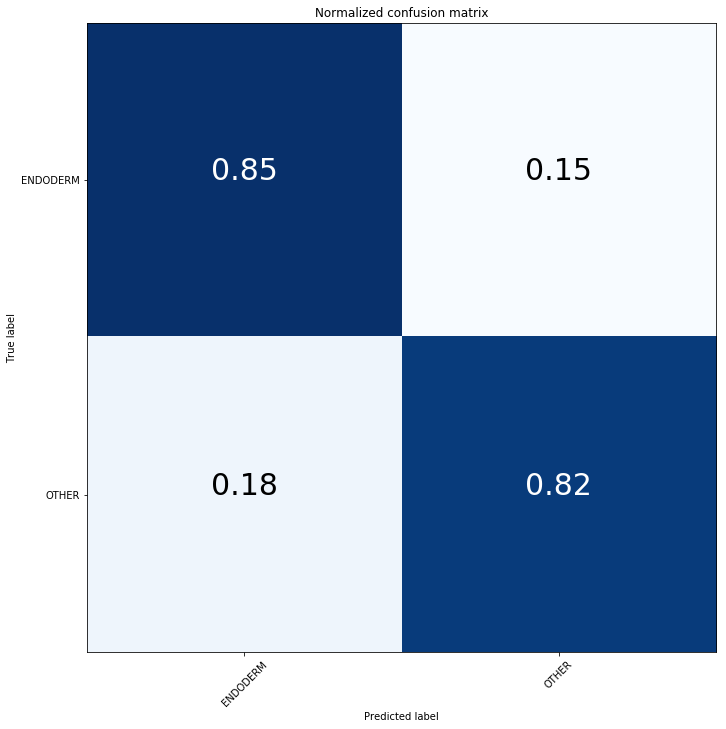

Number of features 150
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(17,19)', u'(2,7)', u'(20,X)', u'(3,5)', u'(4,14)', u'(5,8)',
       u'(9,14)', u'donor_age_at_diagnosis', u'connected_components',
       u'connected_components_max_size',
       ...
       u'proportion_DEL_22', u'proportion_DUP_22', u'proportion_chr_X',
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=150), (2068, 150))
Random Forest 0.8223938223938224
[[212  45]
 [ 47 214]]


<Figure size 432x288 with 0 Axes>

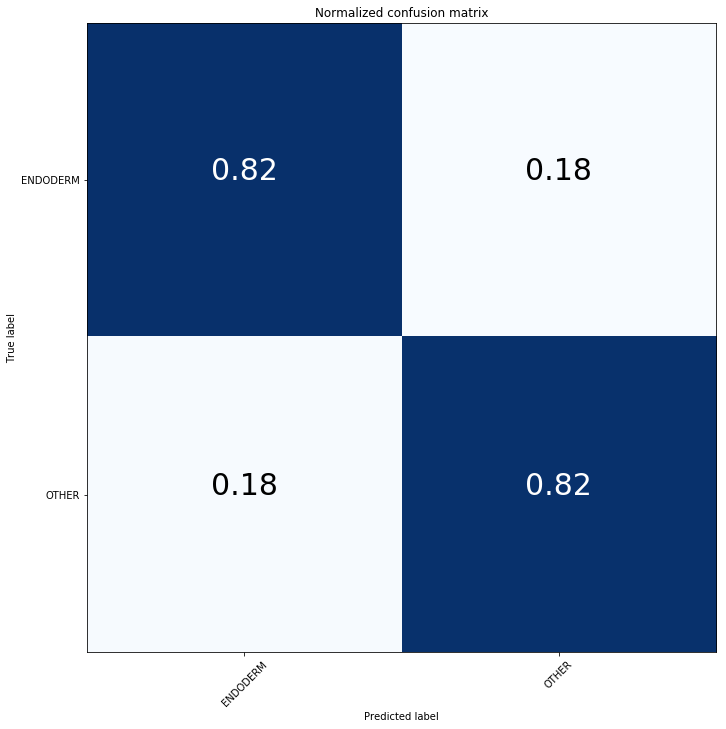

Number of features 100
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'(3,5)', u'donor_age_at_diagnosis', u'connected_components',
       u'connected_components_max_size', u'chr_1', u'chr_2', u'chr_3',
       u'chr_4', u'chr_5', u'chr_6', u'chr_7', u'DEL_7', u'chr_8', u'chr_9',
       u'chr_10', u'DEL_10', u'chr_11', u'DEL_11', u'DUP_11', u'chr_12',
       u'DEL_12', u'chr_16', u'chr_17', u'chr_19', u'chr_21', u'DUP', u'DEL',
       u'TRA', u'h2hINV', u't2tINV', u'number_of_breaks', u'female',
       u'tumor_stage1_Primary_tumour', u'tumor_stage1_Recurrent_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_1', u'proportion_DEL_1',
       u'proportion_DUP_1', u'proportion_chr_2', u'proportion_DEL_2',
       u'proportion_DUP_2', u'proportion_chr_3', u'proportion_DEL_3',
       u'proportion_DUP_3', u'proportion_chr_4', u'proportion_DE

<Figure size 432x288 with 0 Axes>

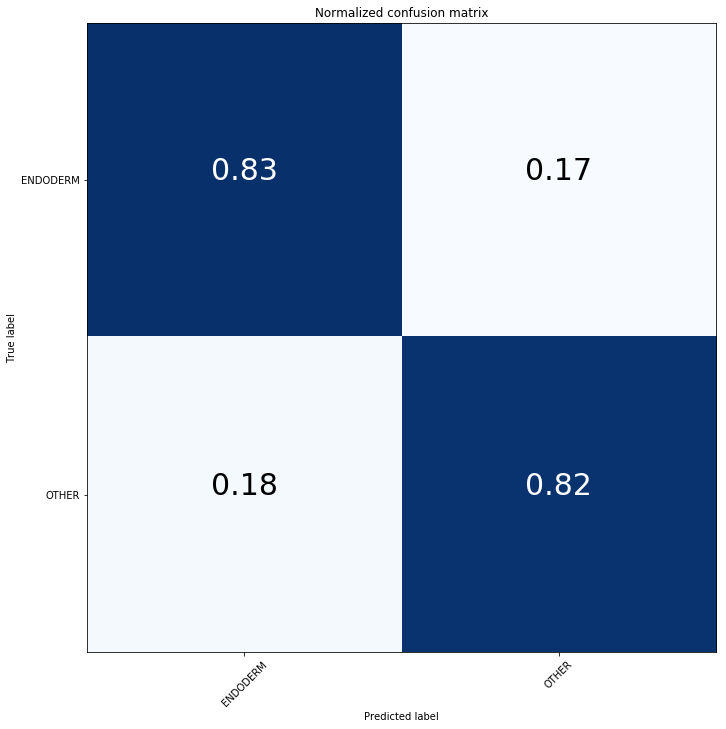

Number of features 50
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'connected_components_max_size', u'chr_6',
       u'chr_8', u'chr_11', u'chr_12', u'chr_21', u'DUP', u'DEL', u'TRA',
       u'number_of_breaks', u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_1', u'proportion_chr_2',
       u'proportion_DEL_2', u'proportion_chr_3', u'proportion_DEL_3',
       u'proportion_chr_4', u'proportion_DEL_4', u'proportion_chr_5',
       u'proportion_chr_6', u'proportion_chr_7', u'proportion_chr_8',
       u'proportion_DEL_8', u'proportion_chr_9', u'proportion_DEL_9',
       u'proportion_chr_10', u'proportion_chr_11', u'proportion_DEL_11',
       u'proportion_chr_12', u'proportion_chr_13', u'proportion_chr_14',
       u'proportion_DEL_14', u'proportion_chr_17', u'proportion_ch

<Figure size 432x288 with 0 Axes>

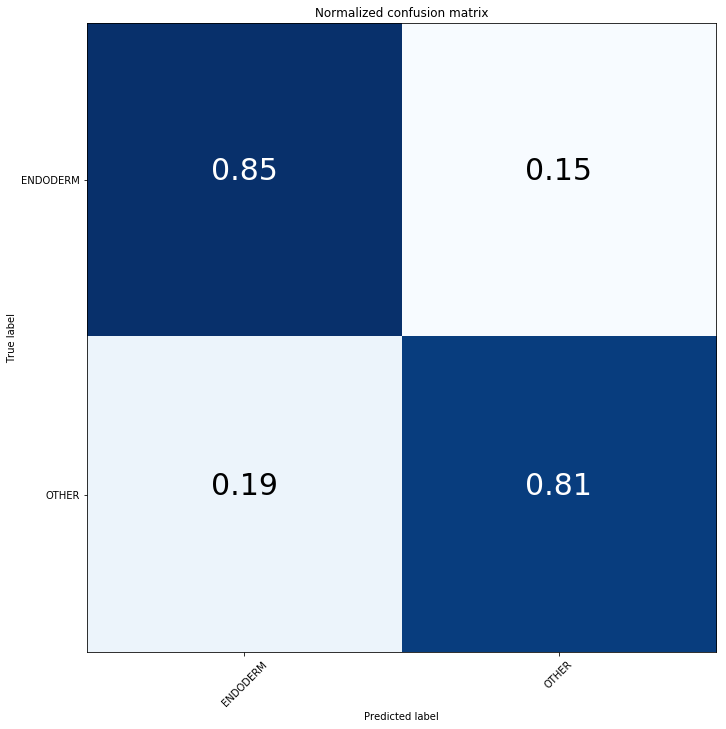

Number of features 20
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'connected_components_max_size', u'DEL',
       u'TRA', u'number_of_breaks', u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_3', u'proportion_chr_4',
       u'proportion_chr_6', u'proportion_chr_7', u'proportion_chr_8',
       u'proportion_chr_21', u'proportion_DUP', u'proportion_DEL',
       u'proportion_TRA'],
      dtype='object'), (2068, 20))
Random Forest 0.8166023166023166
[[211  46]
 [ 49 212]]


<Figure size 432x288 with 0 Axes>

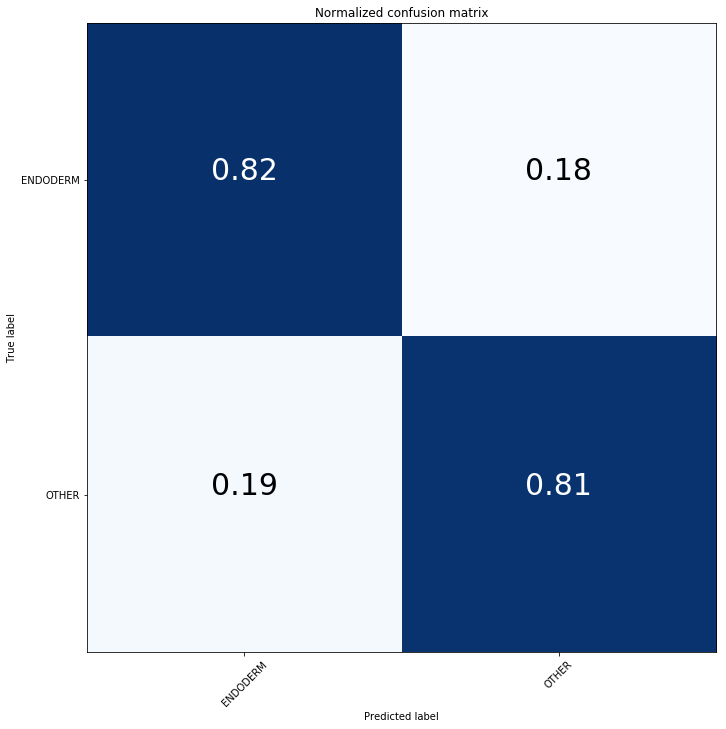

Number of features 15
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'DEL', u'TRA', u'number_of_breaks',
       u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue', u'proportion_chr_4', u'proportion_chr_6',
       u'proportion_chr_21', u'proportion_DEL', u'proportion_TRA'],
      dtype='object'), (2068, 15))
Random Forest 0.8108108108108109
[[210  47]
 [ 51 210]]


<Figure size 432x288 with 0 Axes>

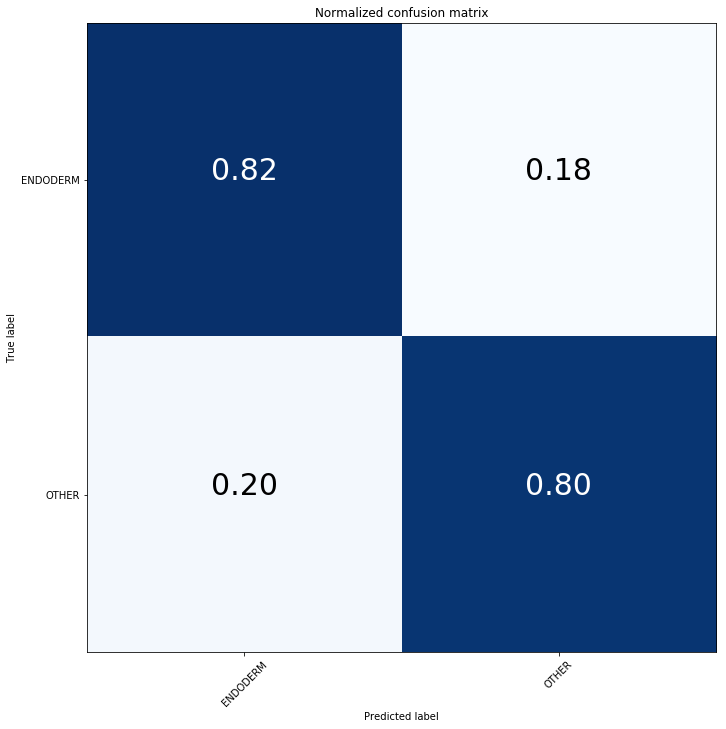

Number of features 10
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'DEL', u'TRA', u'number_of_breaks',
       u'female', u'tumor_stage1_Primary_tumour',
       u'tumor_stage2_blood_derived_(peripheral_blood)',
       u'tumor_stage2_lymph_node', u'tumor_stage2_other',
       u'tumor_stage2_solid_tissue'],
      dtype='object'), (2068, 10))
Random Forest 0.8204633204633205
[[214  43]
 [ 50 211]]


<Figure size 432x288 with 0 Axes>

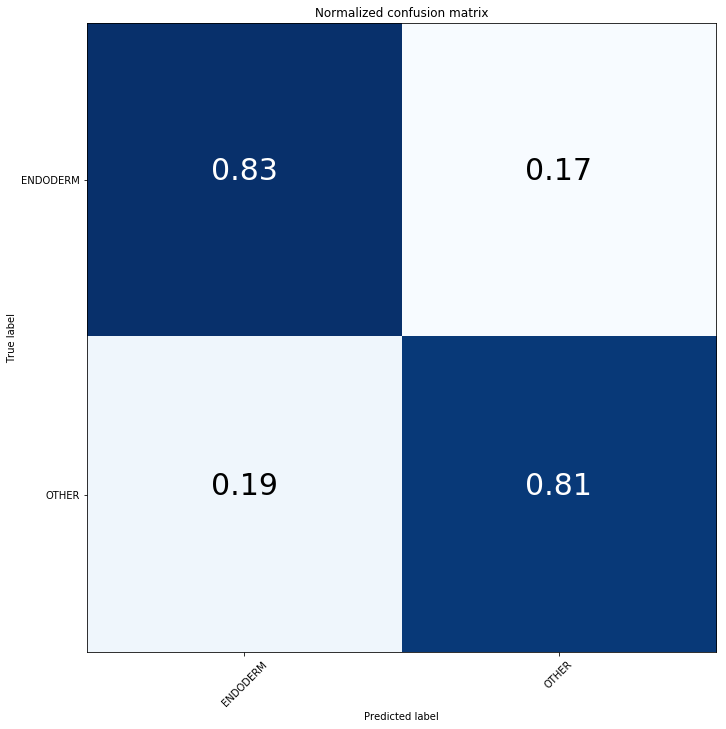

Number of features 5
Preprocessing dataset: ../../data_report/datasets/dataset_final.csv
(Index([u'donor_age_at_diagnosis', u'DEL', u'number_of_breaks', u'female',
       u'tumor_stage2_solid_tissue'],
      dtype='object'), (2068, 5))
Random Forest 0.7625482625482626
[[195  62]
 [ 61 200]]


<Figure size 432x288 with 0 Axes>

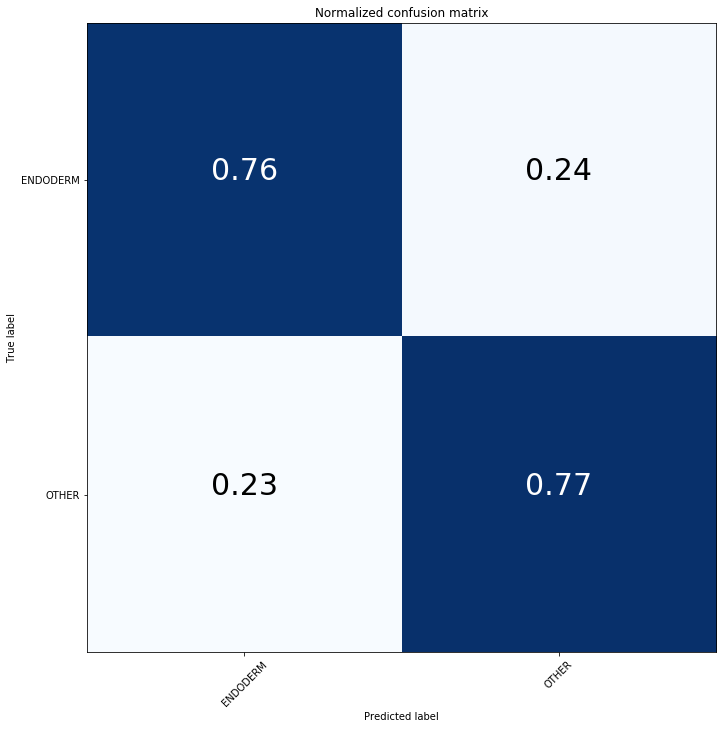

<Figure size 432x288 with 0 Axes>

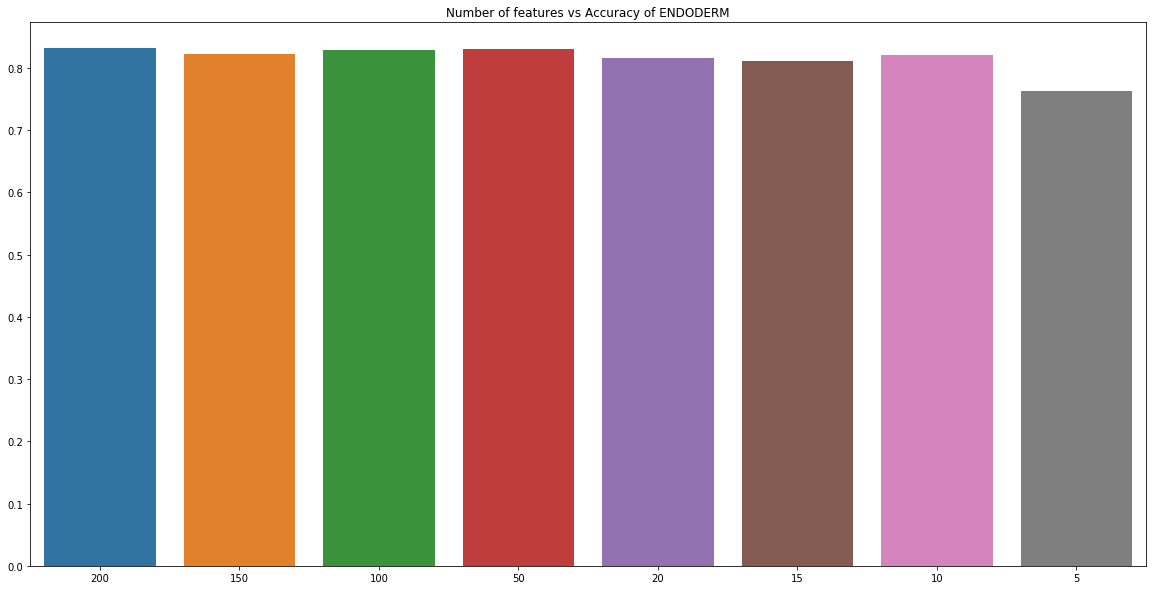

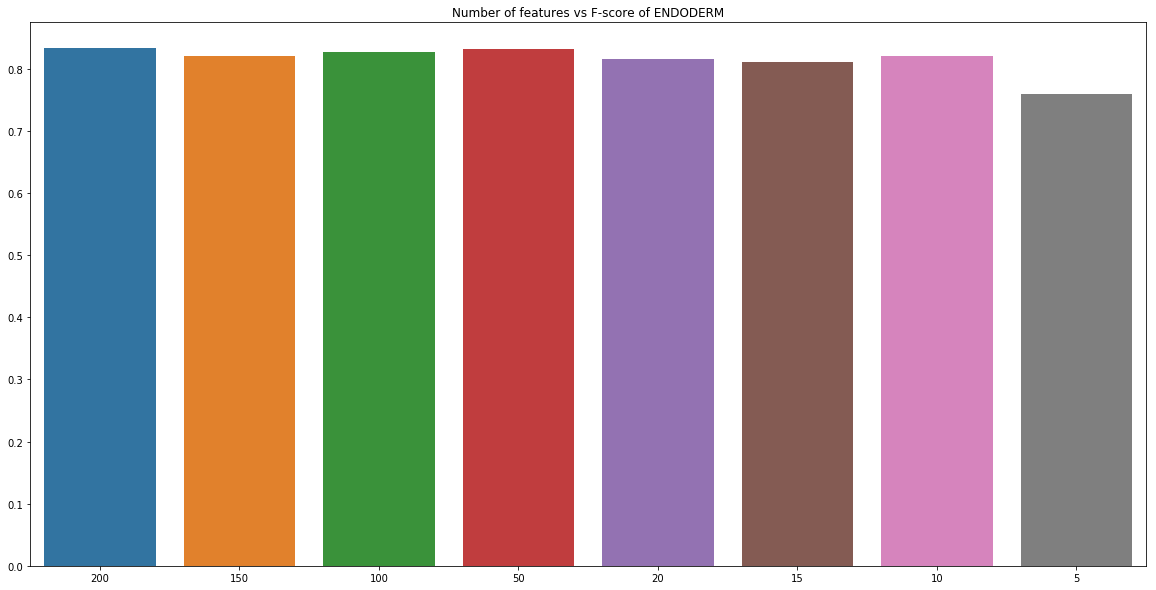

In [137]:
def perform_feature_selection_one_vs_all(path,best_params,all_fi_dict,class_names=labels):
    all_accuracies = {}
    all_fscores= {}
    for class_name in class_names:
        print class_name
        fi_dict = all_fi_dict[class_name]
        D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
        num_features = [200,150,100,50,20,15,10,5]
        accuracies = []
        fscores = []
        for num in num_features:
            print 'Number of features', num
            to_drop = np.array(D.keys())[num:]
            to_remove = [c for c in labels if c != class_name]
            df = pd.read_csv(path)
            df = df.replace(to_replace=to_remove, value='OTHER')
            print 'Preprocessing dataset:', path

            X_train, Y_train, X_test, Y_test = preprocessing(df)
            
            X_train = X_train.drop(to_drop,axis=1)
            X_test = X_test.drop(to_drop,axis=1)
            
            print(X_train.columns, X_train.shape)
            random_forest = RandomForestClassifier(**best_params)
            random_forest = random_forest.fit(X_train, Y_train)
            score = random_forest.score(X_test, Y_test)
            
            accuracies.append(score)
            print 'Random Forest', score
            y_test_pred = random_forest.predict(X_test)
            fscore = metrics.f1_score(Y_test, y_test_pred,pos_label= class_name,labels=[class_name, 'OTHER'])
            print 'F score', fscore

            fscores.append(fscore)
            # Compute confusion matrix
            cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                                  labels=[class_name, 'OTHER'])
            print(cnf_matrix)

            # Plot normalized confusion matrix
            plot_confusion_matrix(cnf_matrix, classes=[class_name, 'OTHER'], normalize=True,
                                  title='Normalized confusion matrix', name=str(num))
        all_accuracies[class_name] = accuracies
        plt.figure(figsize=(20, 10))
        sns.barplot(range(len(num_features)), accuracies)
        plt.xticks(range(len(num_features)), num_features)
        plt.title('Number of features vs Accuracy of ' + class_name)
        
        plt.figure(figsize=(20, 10))
        sns.barplot(range(len(num_features)), fscores)
        plt.xticks(range(len(num_features)), num_features)
        plt.title('Number of features vs F-score of ' + class_name)
    return num_features, all_accuracies
    
datasets = ['../../data_report/datasets/dataset_final.csv'] 
num_features, all_accuracies = perform_feature_selection_one_vs_all(datasets[0],best_params,fi_dict_one_vs_all)

Runing feature extractor
Dataset ../../data_chromosome/datasets/dataset_final.csv
One vs all  ECTODERM
Preprocessing dataset: ../../data_chromosome/datasets/dataset_final.csv
Index([u'(1,10)', u'(1,11)', u'(1,12)', u'(1,13)', u'(1,14)', u'(1,15)',
       u'(1,16)', u'(1,17)', u'(1,18)', u'(1,19)',
       ...
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_chr_Y',
       u'proportion_DEL_Y', u'proportion_DUP_Y', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=448)
Best params {'bootstrap': False, 'min_samples_leaf': 5, 'n_estimators': 50, 'min_samples_split': 5, 'criterion': 'gini', 'max_features': 'auto', 'max_depth': 18, 'class_weight': 'balanced'}


<Figure size 432x288 with 0 Axes>

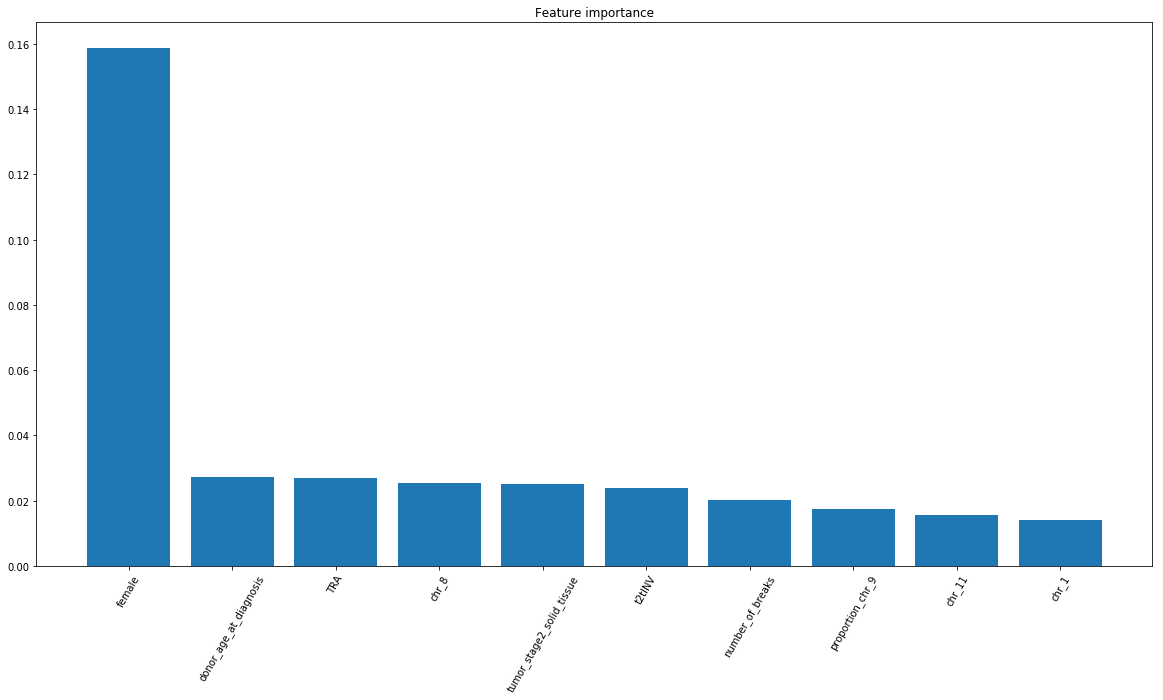

Random Forest 0.915057915057915
[[ 17  25]
 [  9 467]]


<Figure size 432x288 with 0 Axes>

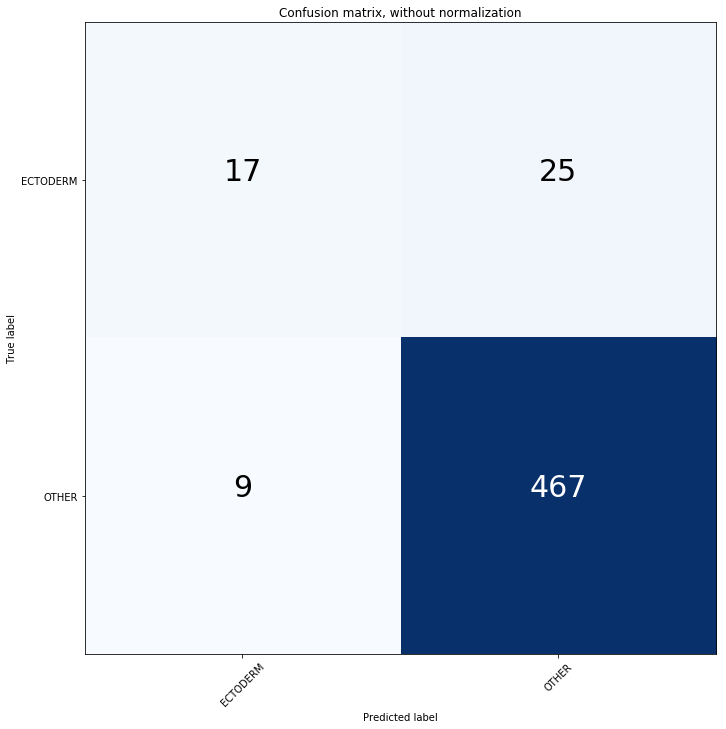

<Figure size 432x288 with 0 Axes>

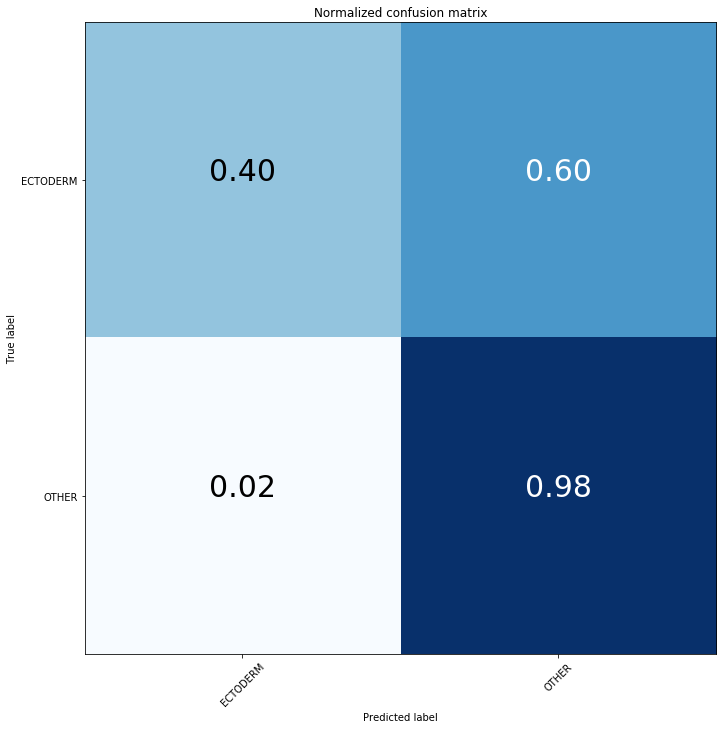

One vs all  NEURAL_CREST
Preprocessing dataset: ../../data_chromosome/datasets/dataset_final.csv
Index([u'(1,10)', u'(1,11)', u'(1,12)', u'(1,13)', u'(1,14)', u'(1,15)',
       u'(1,16)', u'(1,17)', u'(1,18)', u'(1,19)',
       ...
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_chr_Y',
       u'proportion_DEL_Y', u'proportion_DUP_Y', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=448)
Best params {'bootstrap': True, 'min_samples_leaf': 8, 'n_estimators': 50, 'min_samples_split': 7, 'criterion': 'entropy', 'max_features': None, 'max_depth': 10, 'class_weight': 'balanced'}


<Figure size 432x288 with 0 Axes>

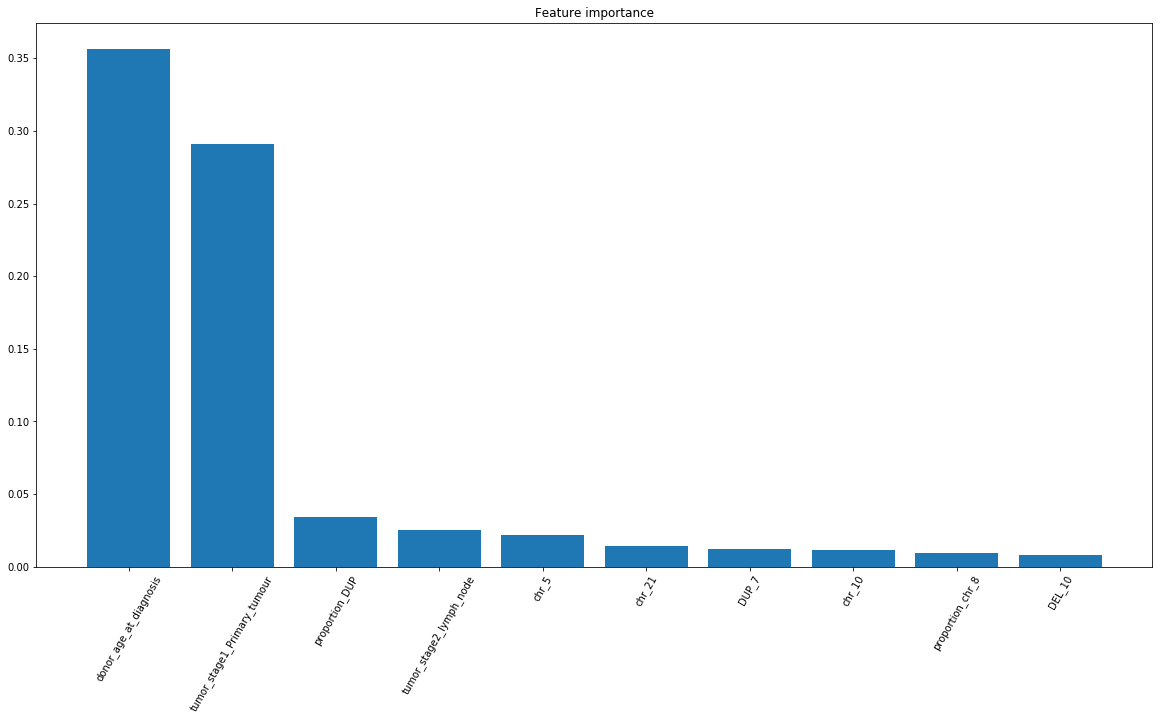

Random Forest 0.9517374517374517
[[ 65   9]
 [ 12 432]]


<Figure size 432x288 with 0 Axes>

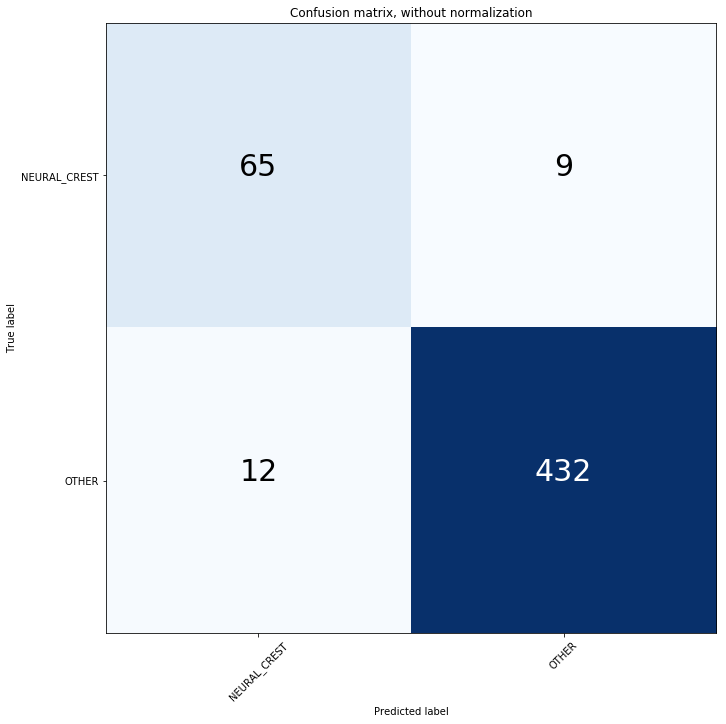

<Figure size 432x288 with 0 Axes>

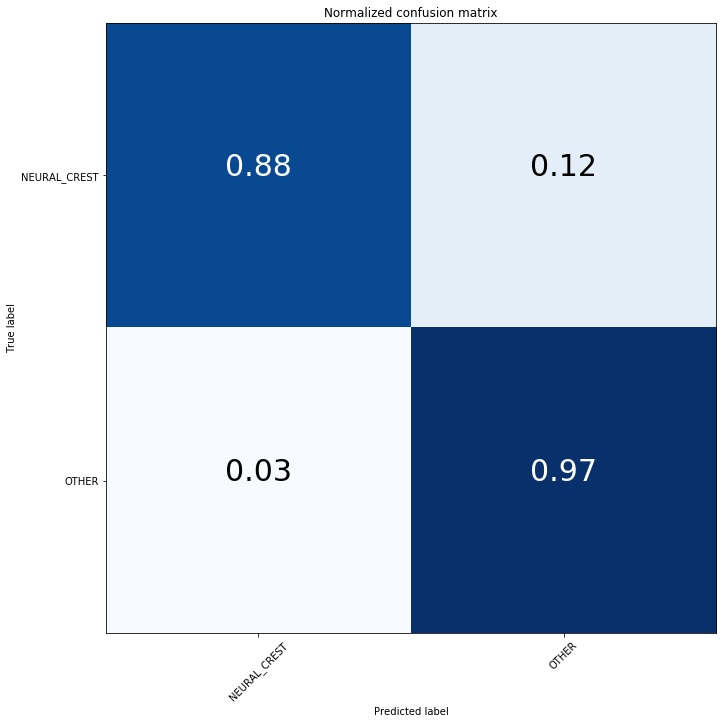

One vs all  MESODERM
Preprocessing dataset: ../../data_chromosome/datasets/dataset_final.csv
Index([u'(1,10)', u'(1,11)', u'(1,12)', u'(1,13)', u'(1,14)', u'(1,15)',
       u'(1,16)', u'(1,17)', u'(1,18)', u'(1,19)',
       ...
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_chr_Y',
       u'proportion_DEL_Y', u'proportion_DUP_Y', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=448)
Best params {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 'min_samples_split': 4, 'criterion': 'entropy', 'max_features': 'auto', 'max_depth': 12, 'class_weight': 'balanced'}


<Figure size 432x288 with 0 Axes>

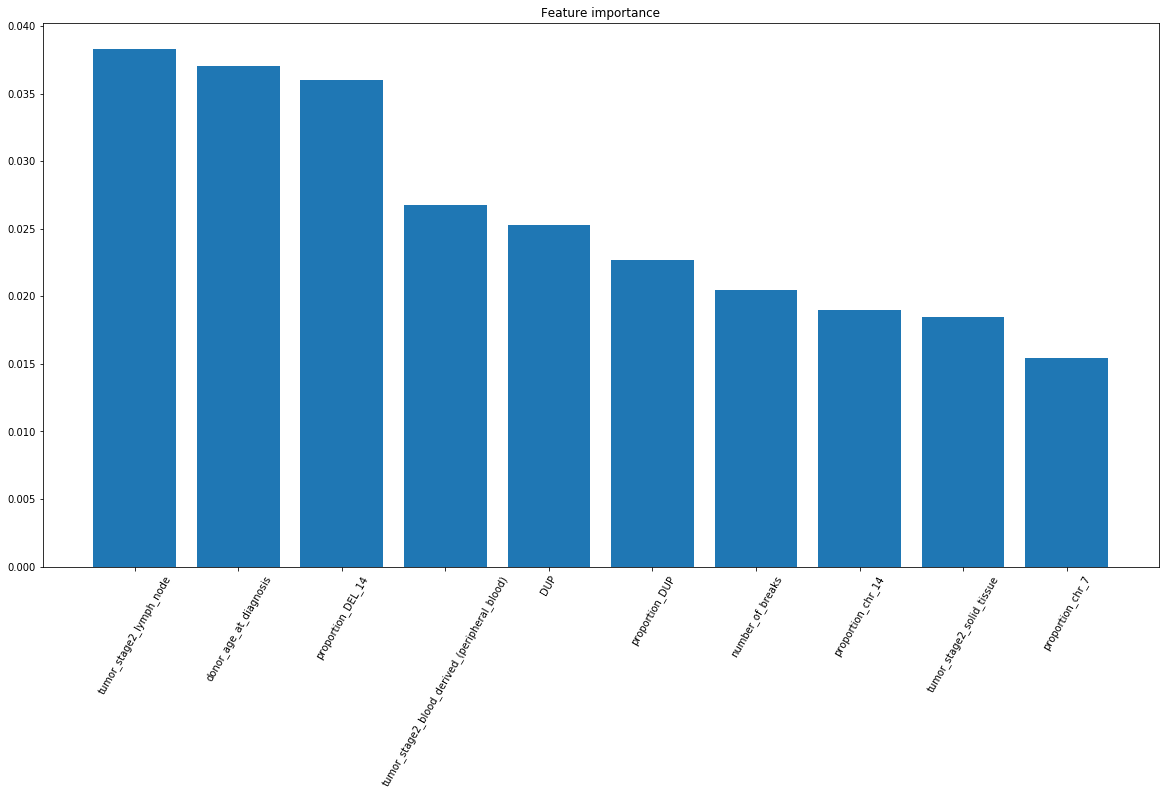

Random Forest 0.7799227799227799
[[ 72  74]
 [ 44 328]]


<Figure size 432x288 with 0 Axes>

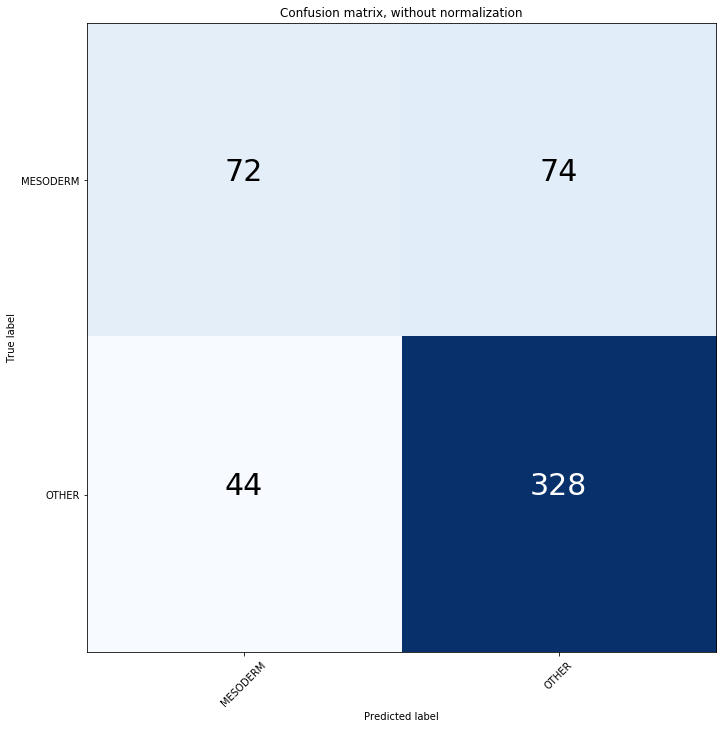

<Figure size 432x288 with 0 Axes>

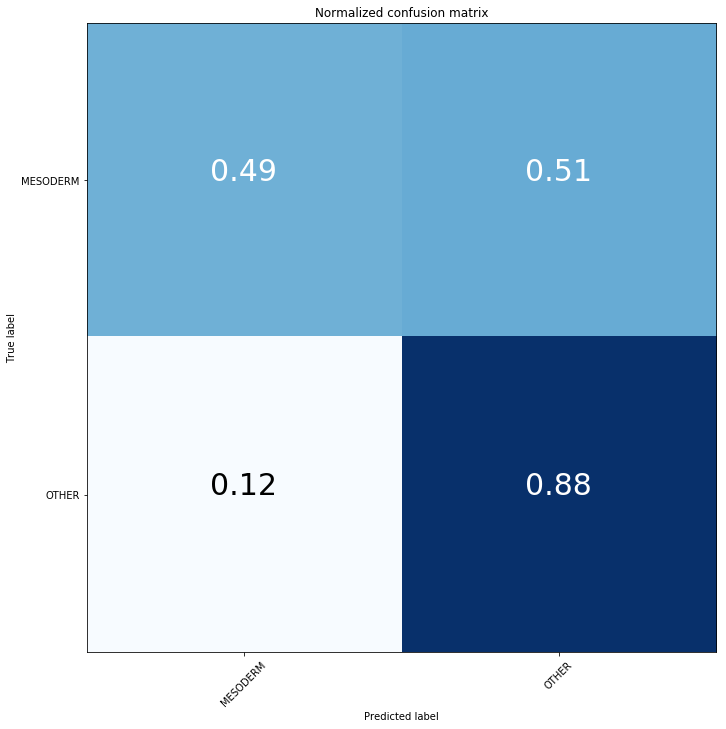

One vs all  ENDODERM
Preprocessing dataset: ../../data_chromosome/datasets/dataset_final.csv
Index([u'(1,10)', u'(1,11)', u'(1,12)', u'(1,13)', u'(1,14)', u'(1,15)',
       u'(1,16)', u'(1,17)', u'(1,18)', u'(1,19)',
       ...
       u'proportion_DEL_X', u'proportion_DUP_X', u'proportion_chr_Y',
       u'proportion_DEL_Y', u'proportion_DUP_Y', u'proportion_DUP',
       u'proportion_DEL', u'proportion_TRA', u'proportion_h2hINV',
       u'proportion_t2tINV'],
      dtype='object', length=448)
Best params {'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 50, 'min_samples_split': 8, 'criterion': 'gini', 'max_features': None, 'max_depth': 10, 'class_weight': 'balanced'}


<Figure size 432x288 with 0 Axes>

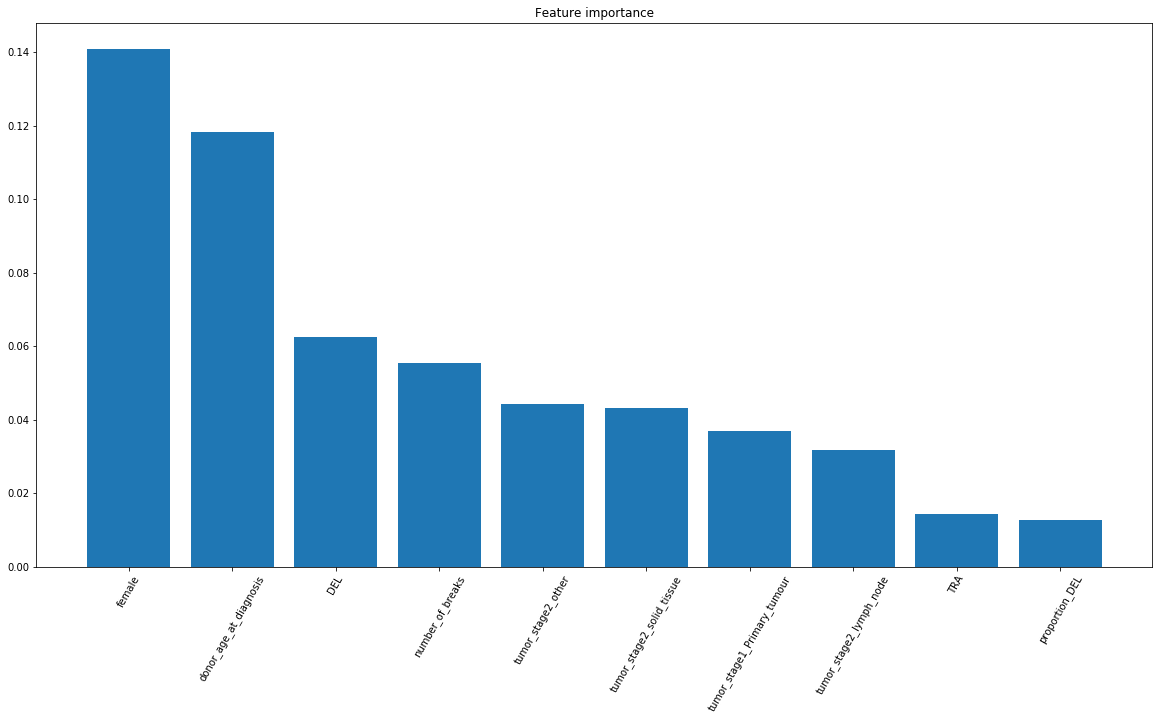

Random Forest 0.8301158301158301
[[215  42]
 [ 46 215]]


<Figure size 432x288 with 0 Axes>

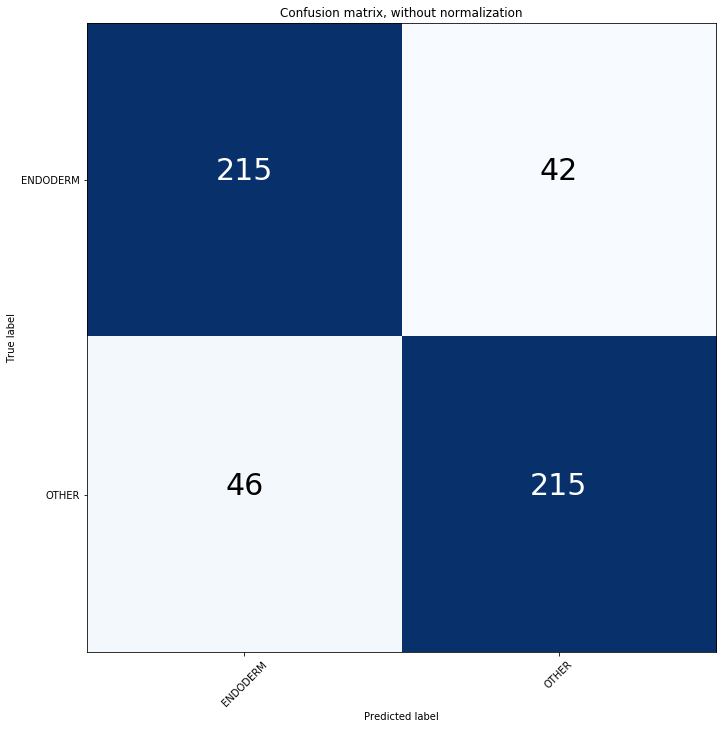

<Figure size 432x288 with 0 Axes>

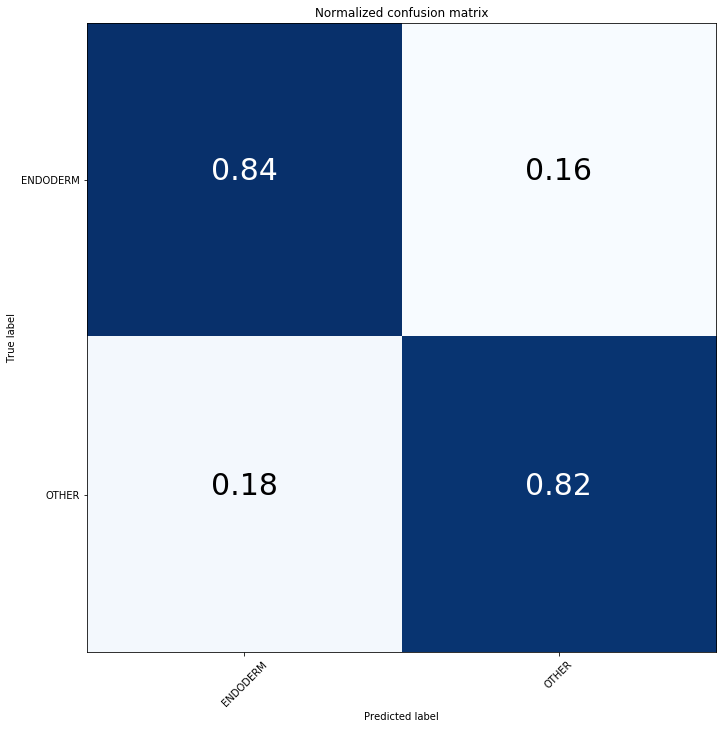

time: 0:05:32.128425


<Figure size 432x288 with 0 Axes>

In [30]:
def main():
    # datasets = os.listdir(DATAPATH + '/datasets/')
    datasets = ['../../data_report/datasets/dataset_final.csv']
    print('Runing feature extractor')
    #run_feature_extractor(datasets)
    one_vs_all_random_forest(datasets[0])


if __name__ == '__main__':
    init = time.time()
    main()
    print'time:', timedelta(seconds=time.time() - init)

# TODO:
Fijar los hiperparámetros y ejecutar el feature extractor chorrocientas veces, para obtener cuantas veces me elige cada feature. 